In [1]:
# **Objective 1: Data Acquisition and Intelligent Preprocessing**

# **Dataset Acquisition:** Download the "Diabetes Health Indicators Dataset" from Kaggle.
# Access to Relevant Datasets: "Diabetes Health Indicators Dataset" from Kaggle:
# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

# **Import necessary libraries**
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, f1_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler 

pd.set_option('display.max_columns', None) 

from statsmodels.stats.outliers_influence import variance_inflation_factor # Import VIF function here

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from math import pi # Needed for calculating angles
from sklearn.metrics import precision_score, recall_score  # Import specific metrics


# Data Loading
print("Loading the Diabetes Health Indicators Dataset...")
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
print("Dataset loaded successfully!")

# **Data Inspection:** Conduct initial data inspection to understand data structure, variable types, and identify potential data quality issues.
print("\nInitial Data Inspection:")
display(data.head())
print("\nDataset Information:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe().T)

Loading the Diabetes Health Indicators Dataset...
Dataset loaded successfully!

Initial Data Inspection:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 n

In [2]:
# **Data Cleaning:** Address missing values, identify and manage outliers, normalize features.
print("\nData Cleaning and Preprocessing:")

# Check for missing values
print("\nMissing values before handling:")
print(data.isnull().sum())
# No missing values detected in this dataset, as indicated in the project proposal and dataset description.

# Identify and handle outliers for all numerical features using IQR and KNN Imputation
numerical_features_for_outlier_handling = ['BMI', 'Age', 'Income', 'MentHlth', 'PhysHlth'] # List of numerical features to handle outliers

print("\nHandling outliers for numerical features using IQR and KNN Imputation:")
imputer = KNNImputer(n_neighbors=5) # Initialize KNNImputer - you can tune n_neighbors

for feature in numerical_features_for_outlier_handling:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outlier identification
    outlier_indices = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index
    print(f"\nNumber of {feature} outliers (using IQR): {len(outlier_indices)}")

    # KNN Imputation of outliers
    if not outlier_indices.empty: # Only impute if outliers exist
        imputed_values = imputer.fit_transform(data[[feature]]) # Fit imputer on the feature column
        data.loc[outlier_indices, feature] = imputed_values[outlier_indices, 0] # Impute outliers with KNN-imputed values
        print(f"{feature} outliers imputed using KNN.")
    else:
        print(f"No outliers found for {feature}, skipping imputation.")


Data Cleaning and Preprocessing:

Missing values before handling:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Handling outliers for numerical features using IQR and KNN Imputation:

Number of BMI outliers (using IQR): 9847
BMI outliers imputed using KNN.

Number of Age outliers (using IQR): 0
No outliers found for Age, skipping imputation.

Number of Income outliers (using IQR): 0
No outliers found for Income, skipping imputation.

Number of MentHlth ou

In [3]:
# # **Feature Normalization/Scaling:** Apply appropriate normalization or scaling techniques
# RobustScaler 
scaler_robust = RobustScaler()
numerical_features = ['BMI', 'Age', 'Income', 'MentHlth', 'PhysHlth']
data[numerical_features] = scaler_robust.fit_transform(data[numerical_features])
print("\nNumerical features normalized/scaled using RobustScaler.")

# **Data Splitting:** Split the preprocessed data into training, validation, and testing sets
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) # Initial split for train and temp (validation+test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Split temp into validation and test

print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

print("\n**Objective 1: Data Acquisition and Intelligent Preprocessing - COMPLETED**")



Numerical features normalized/scaled using RobustScaler.

Training set shape: (177576, 21)
Validation set shape: (38052, 21)
Test set shape: (38052, 21)

**Objective 1: Data Acquisition and Intelligent Preprocessing - COMPLETED**



**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering**

Univariate Analysis - Distribution of Features:


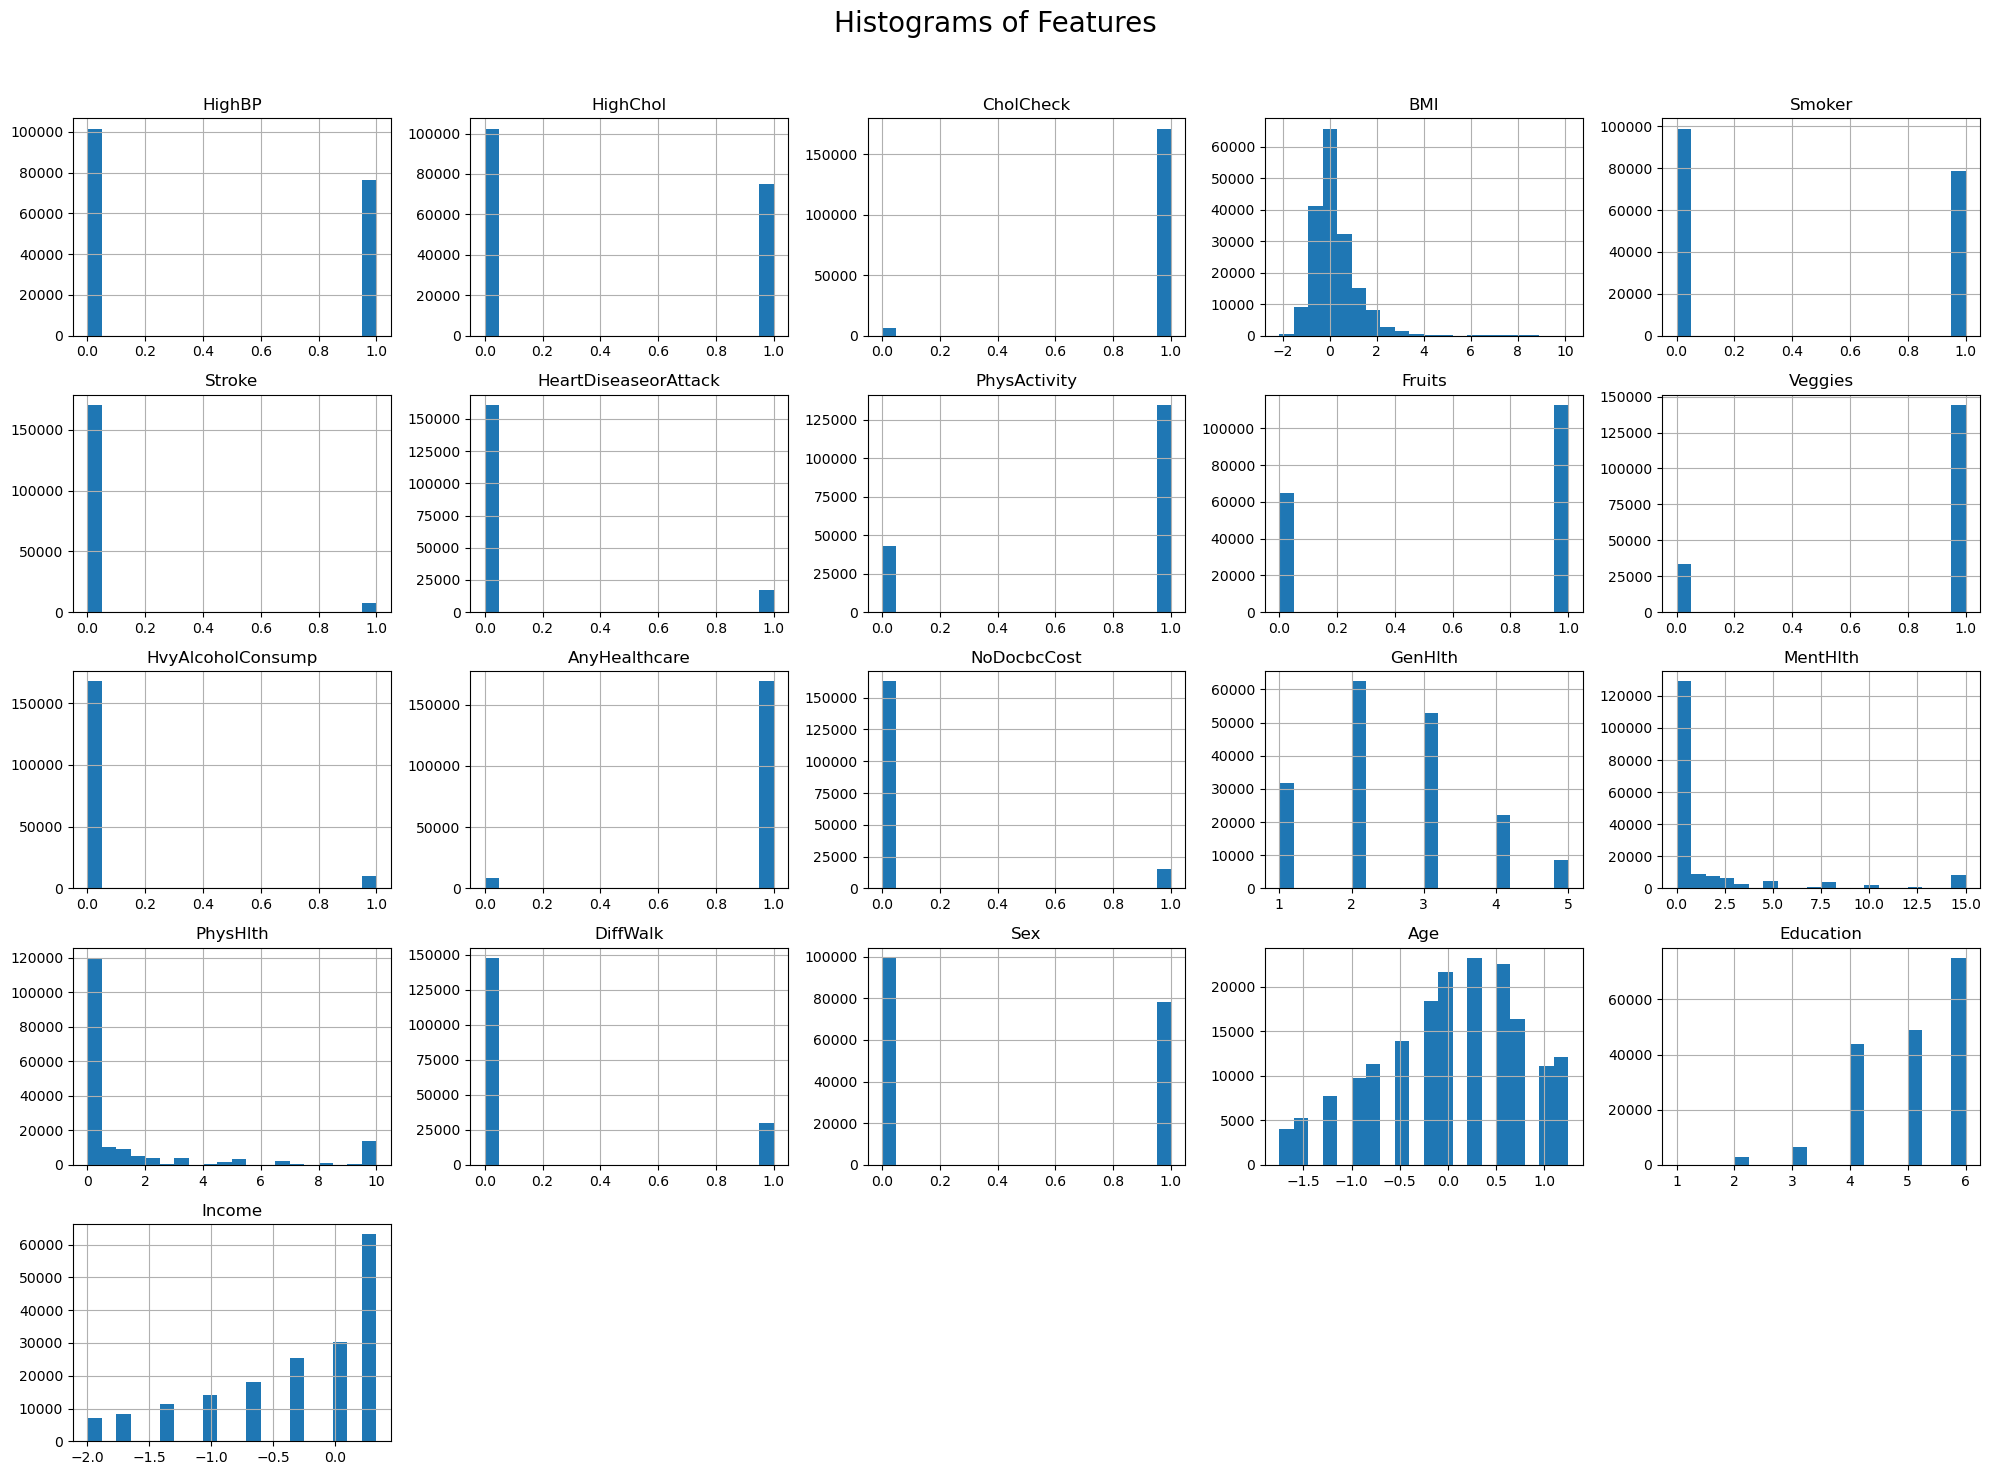

In [4]:
# **Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering**

print("\n**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering**")

# **Univariate Analysis:** Analyze the distribution of individual features
print("\nUnivariate Analysis - Distribution of Features:")
X_train.hist(figsize=(20,15), bins=20)
plt.suptitle('Histograms of Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to fit title
plt.show()



Bivariate Analysis - Correlation Matrix:


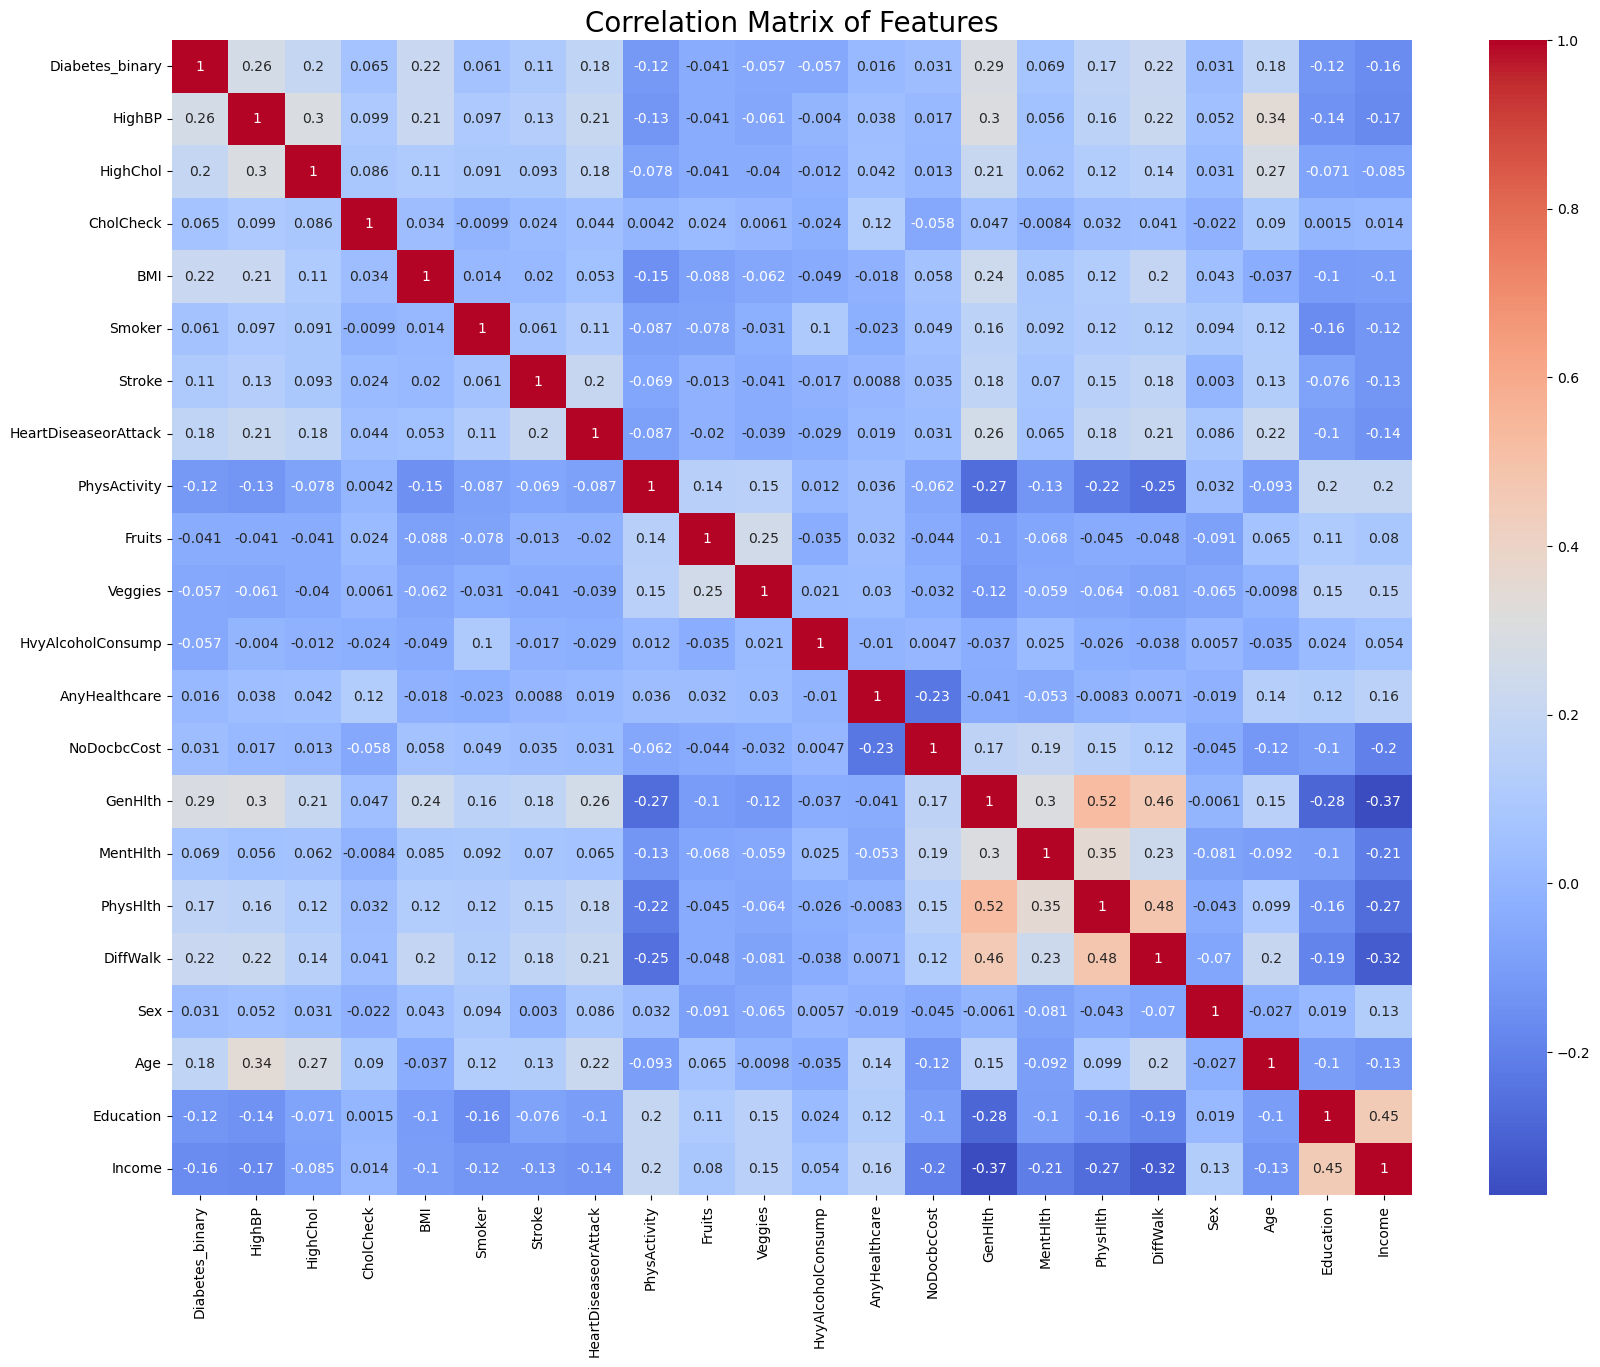

In [5]:
# **Bivariate and Multivariate Analysis:** Explore relationships between features and the target variable
print("\nBivariate Analysis - Correlation Matrix:")
correlation_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()


Bivariate Analysis - Enhanced Pair Plots (Optimal Combination - KDE Off-Diagonal, Histograms Diagonal):


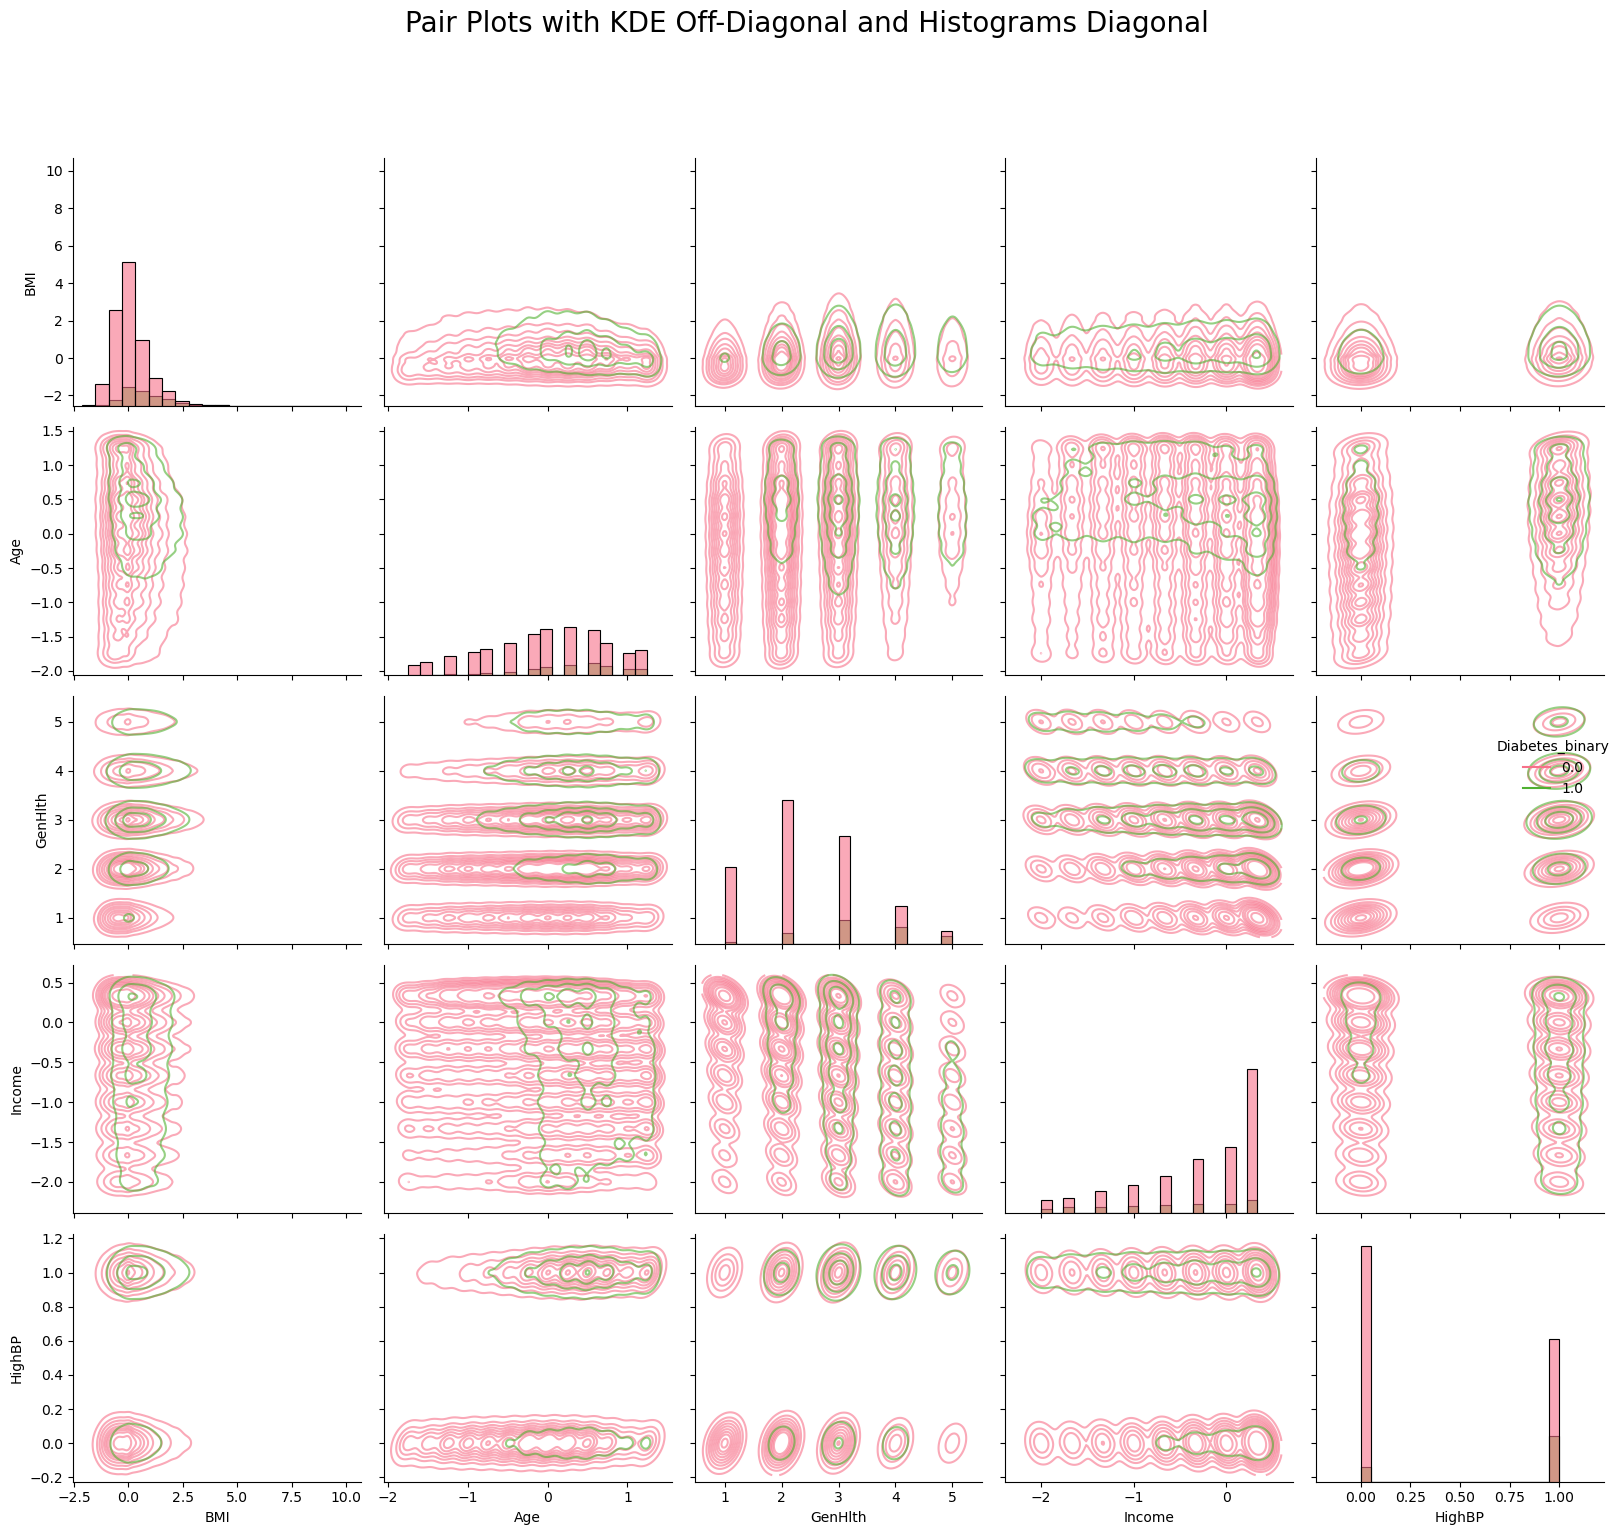

In [6]:
# Pair plots for selected features 
print("\nBivariate Analysis - Enhanced Pair Plots (Optimal Combination - KDE Off-Diagonal, Histograms Diagonal):")

features_for_pairplot = ['Diabetes_binary', 'BMI', 'Age', 'GenHlth', 'Income', 'HighBP']

# Define a visually distinct color palette
palette = sns.color_palette("husl", n_colors=3)[:2] # Use only first 2 colors for binary target

pair_plot_grid_kde_hist = sns.pairplot(
    data[features_for_pairplot],
    hue='Diabetes_binary',
    kind='kde', # Use KDE for off-diagonal plots for bivariate distributions
    diag_kind='hist', # Diagonal as histogram for univariate distributions
    palette=palette,
    plot_kws={'alpha': 0.6}, # Customization for KDE plots (transparency)
    diag_kws={'bins': 20, 'fill': True, 'alpha': 0.6, 'color': [palette[0], palette[1]]}, # Customize histograms
    height=3 # Adjust height for readability
)

pair_plot_grid_kde_hist.fig.suptitle("Pair Plots with KDE Off-Diagonal and Histograms Diagonal", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Univariate Analysis - Boxplots for Key Features:


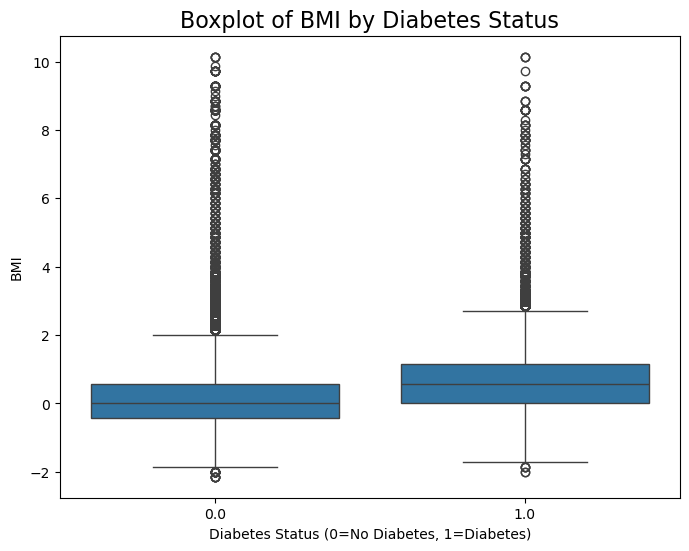

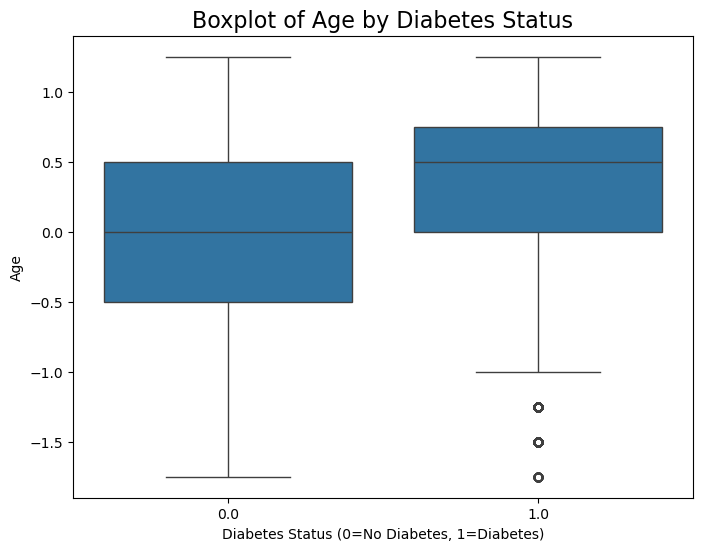

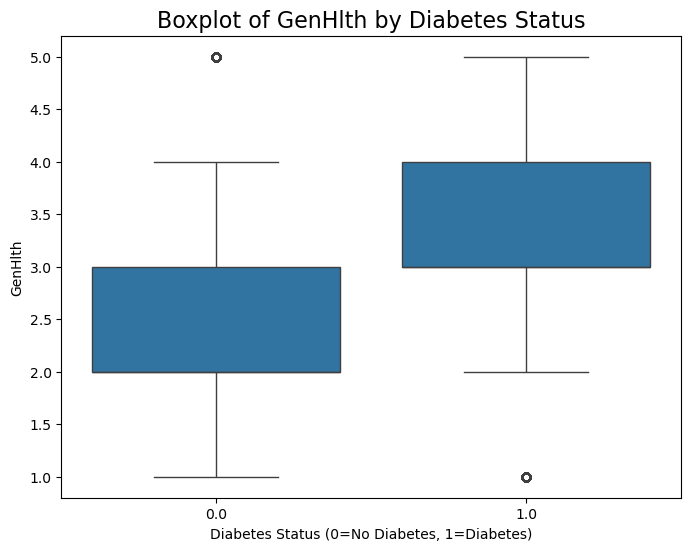

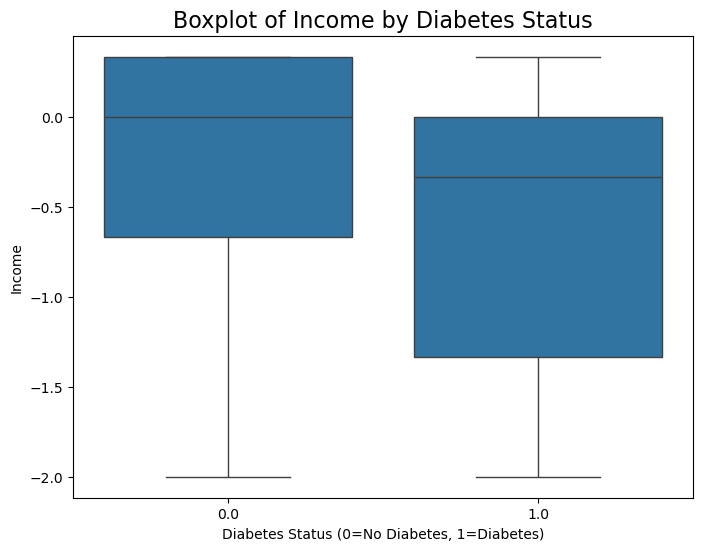

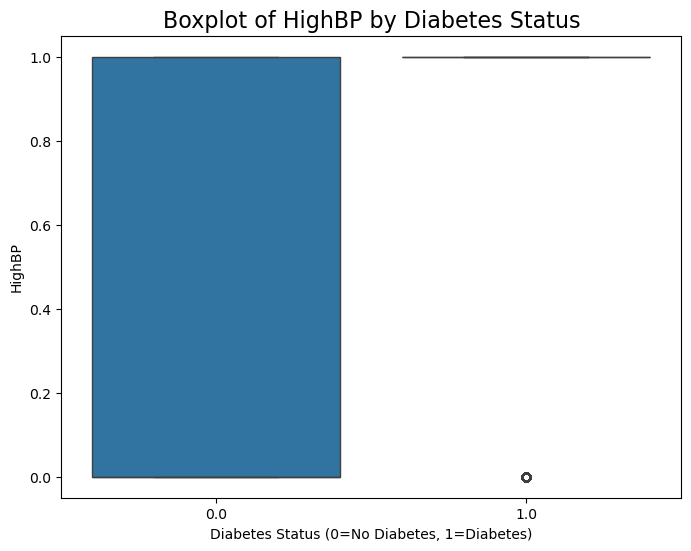


Univariate Analysis - Violin Plots for Key Features:


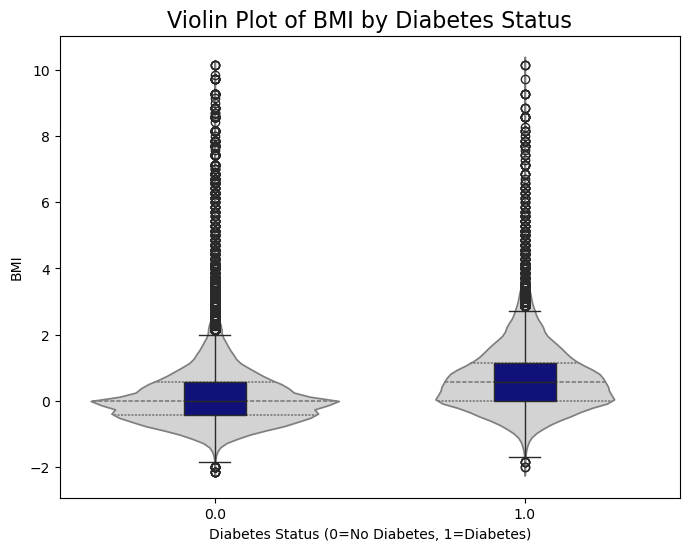

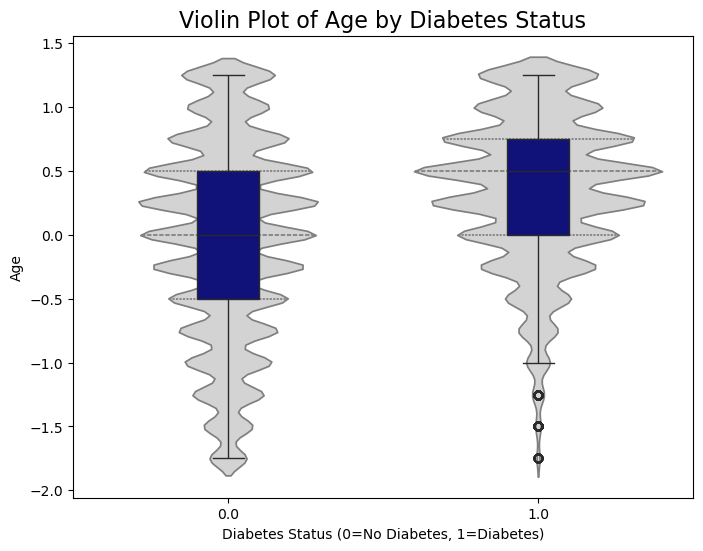

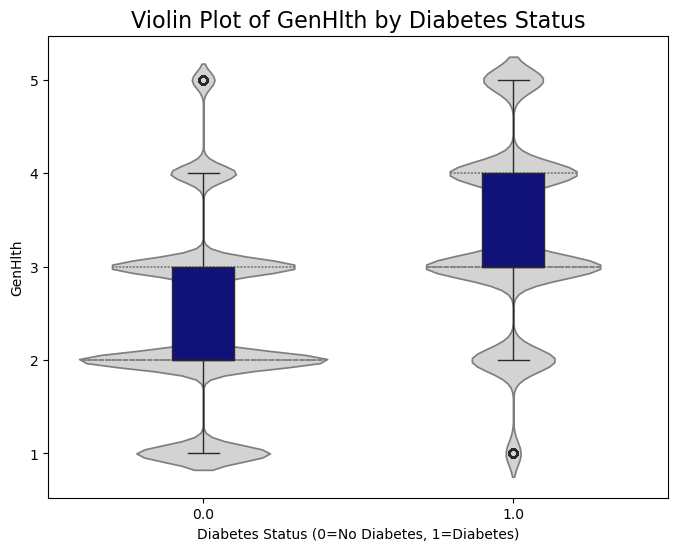

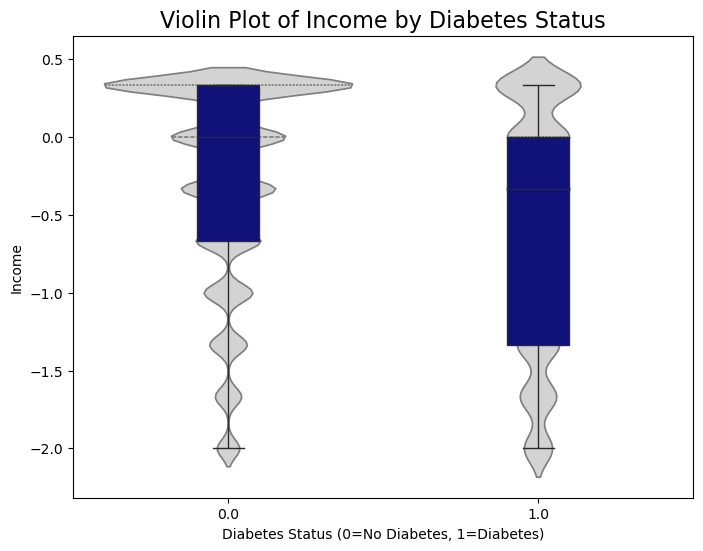

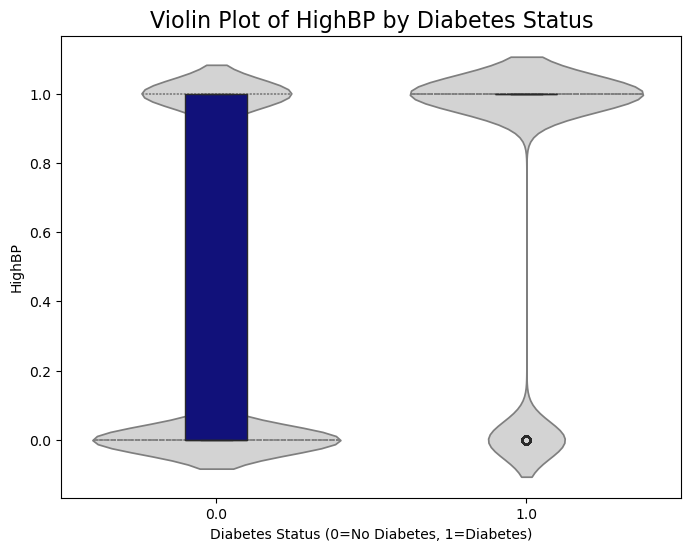

In [7]:
# Univariate Analysis - Boxplots and Violin Plots for Key Features
print("\nUnivariate Analysis - Boxplots for Key Features:")

features_for_boxplots_violin = ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP'] # Key features list (excluding target)

for feature in features_for_boxplots_violin:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Diabetes_binary', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Diabetes Status', fontsize=16)
    plt.xlabel('Diabetes Status (0=No Diabetes, 1=Diabetes)')
    plt.ylabel(feature)
    plt.show()

print("\nUnivariate Analysis - Violin Plots for Key Features:")

for feature in features_for_boxplots_violin:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Diabetes_binary', y=feature, data=data, inner="quart", color="lightgray") # Added inner="quart" and color for better visualization
    sns.boxplot(x='Diabetes_binary', y=feature, data=data, width=0.2, color="darkblue") # Overlay boxplot for median and IQR
    plt.title(f'Violin Plot of {feature} by Diabetes Status', fontsize=16)
    plt.xlabel('Diabetes Status (0=No Diabetes, 1=Diabetes)')
    plt.ylabel(feature)
    plt.show()


In [8]:
# **Feature Engineering:** Explore feature engineering techniques to create new, potentially more informative features.
print("\nFeature Engineering - Creating Interaction and Categorical Features based on EDA Insights:")

# 1. BMI Categories Feature:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

X_train['BMI_Category'] = X_train['BMI'].apply(bmi_category)
X_val['BMI_Category'] = X_val['BMI'].apply(bmi_category)
X_test['BMI_Category'] = X_test['BMI'].apply(bmi_category)
print("Engineered 'BMI_Category' feature.")


# 2. BMI-Age Interaction Feature:
X_train['BMI_Age_Interaction'] = X_train['BMI'] * X_train['Age']
X_val['BMI_Age_Interaction'] = X_val['BMI'] * X_val['Age']
X_test['BMI_Age_Interaction'] = X_test['BMI'] * X_test['Age']
print("Engineered 'BMI_Age_Interaction' feature.")

# 3. GenHlth-HighBP Interaction Feature:
X_train['Health_Risk_Index'] = X_train['GenHlth'] * X_train['HighBP']
X_val['Health_Risk_Index'] = X_val['GenHlth'] * X_val['HighBP']
X_test['Health_Risk_Index'] = X_test['GenHlth'] * X_test['HighBP']
print("Engineered 'Health_Risk_Index' feature.")


# One-Hot Encode Categorical Feature: BMI_Category
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for dense array output
encoder.fit(X_train[['BMI_Category']]) # Fit encoder on training data categories

# Transform train, validation, and test sets
bmi_cat_train_encoded = encoder.transform(X_train[['BMI_Category']])
bmi_cat_val_encoded = encoder.transform(X_val[['BMI_Category']])
bmi_cat_test_encoded = encoder.transform(X_test[['BMI_Category']])

# Create DataFrames from encoded arrays and set column names
bmi_cat_train_df = pd.DataFrame(bmi_cat_train_encoded, columns=encoder.get_feature_names_out(['BMI_Category']), index=X_train.index)
bmi_cat_val_df = pd.DataFrame(bmi_cat_val_encoded, columns=encoder.get_feature_names_out(['BMI_Category']), index=X_val.index)
bmi_cat_test_df = pd.DataFrame(bmi_cat_test_encoded, columns=encoder.get_feature_names_out(['BMI_Category']), index=X_test.index)

# Concatenate encoded features with original DataFrames (dropping original BMI_Category column)
X_train = pd.concat([X_train.drop('BMI_Category', axis=1), bmi_cat_train_df], axis=1)
X_val = pd.concat([X_val.drop('BMI_Category', axis=1), bmi_cat_val_df], axis=1)
X_test = pd.concat([X_test.drop('BMI_Category', axis=1), bmi_cat_test_df], axis=1)

print("One-hot encoded 'BMI_Category' feature and concatenated to DataFrames.")


print("\n**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering - COMPLETED**")


Feature Engineering - Creating Interaction and Categorical Features based on EDA Insights:
Engineered 'BMI_Category' feature.
Engineered 'BMI_Age_Interaction' feature.
Engineered 'Health_Risk_Index' feature.
One-hot encoded 'BMI_Category' feature and concatenated to DataFrames.

**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering - COMPLETED**


In [9]:
# --- Feature Selection/Reduction based on Correlation (Illustrative Example - User can customize) ---
print("\nFeature Selection/Reduction - Correlation-based (Illustrative Example):")

correlation_threshold = 0.8 # Example threshold - adjust as needed

# Calculate correlation matrix (already calculated earlier as correlation_matrix)
# Use the correlation matrix calculated earlier: correlation_matrix = data.corr()

# Identify highly correlated features (absolute value of correlation > threshold)
upper_triangle_corr_matrix = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.corr().shape), k=1).astype(bool)) # Select upper triangle for redundancy removal
highly_corr_features = [column for column in upper_triangle_corr_matrix.columns if any(upper_triangle_corr_matrix[column] > correlation_threshold)]

print(f"\nFeatures identified for potential removal based on correlation > {correlation_threshold}: {highly_corr_features}")

# Example: Reduce features by dropping highly correlated ones (Illustrative - User can customize)
X_reduced_corr = X_train.drop(highly_corr_features, axis=1, errors='ignore') # errors='ignore' in case some features are already dropped
print(f"Shape of X_train before correlation-based reduction: {X_train.shape}")
print(f"Shape of X_reduced_corr after correlation-based reduction: {X_reduced_corr.shape}")


# --- Calculate VIF for the remaining features AFTER correlation-based reduction ---
print("\n--- Calculating VIF for remaining features ---")

vif_data = pd.DataFrame()
vif_data["feature"] = X_reduced_corr.columns # Use X_reduced_corr columns

# Impute infinite values with a large number (e.g., 1e10) before calculating VIF
X_reduced_corr_fillna = X_reduced_corr.replace([np.inf, -np.inf], 1e10)

# Handle potential NaN values in X_reduced_corr_fillna (impute with mean for VIF calculation)
X_reduced_corr_fillna = X_reduced_corr_fillna.fillna(X_reduced_corr_fillna.mean(numeric_only=True))

vif_data["VIF"] = [variance_inflation_factor(X_reduced_corr_fillna.values, i)
                   for i in range(X_reduced_corr_fillna.shape[1])]  # Use X_reduced_corr_fillna

print(vif_data.sort_values(by=['VIF'], ascending=False))
print("\n--- VIF Interpretation ---")
print("VIF values > 5 or 10 are often considered indicative of high multicollinearity.")
print("Consider further feature reduction or using regularization techniques if multicollinearity is still a concern.")


Feature Selection/Reduction - Correlation-based (Illustrative Example):

Features identified for potential removal based on correlation > 0.8: []
Shape of X_train before correlation-based reduction: (177576, 24)
Shape of X_reduced_corr after correlation-based reduction: (177576, 24)

--- Calculating VIF for remaining features ---
                     feature         VIF
23  BMI_Category_Underweight  100.773872
22         Health_Risk_Index   10.109524
0                     HighBP    7.926670
13                   GenHlth    2.573591
15                  PhysHlth    1.633104
16                  DiffWalk    1.558273
20                    Income    1.503468
18                       Age    1.356778
19                 Education    1.324851
14                  MentHlth    1.236949
6       HeartDiseaseorAttack    1.181825
3                        BMI    1.176287
1                   HighChol    1.172696
7               PhysActivity    1.156974
12               NoDocbcCost    1.144489
11         

In [10]:
# --- Address Multicollinearity - Remove BMI_Category_Underweight ---
X_reduced_corr = X_reduced_corr.drop('BMI_Category_Underweight', axis=1, errors='ignore')
X_val = X_val.drop('BMI_Category_Underweight', axis=1, errors='ignore') # Apply to validation set as well
X_test = X_test.drop('BMI_Category_Underweight', axis=1, errors='ignore') # Apply to test set as well
print("\nRemoved 'BMI_Category_Underweight' feature to reduce multicollinearity.")
print(f"Shape of X_reduced_corr after removing BMI_Category_Underweight: {X_reduced_corr.shape}")


# --- Re-calculate VIF for the remaining features AFTER removing BMI_Category_Underweight ---
print("\n--- Re-calculating VIF for remaining features ---")

vif_data = pd.DataFrame()
vif_data["feature"] = X_reduced_corr.columns # Use X_reduced_corr columns

# Impute infinite values with a large number (e.g., 1e10) before calculating VIF
X_reduced_corr_fillna = X_reduced_corr.replace([np.inf, -np.inf], 1e10)

# Handle potential NaN values in X_reduced_corr_fillna (impute with mean for VIF calculation)
X_reduced_corr_fillna = X_reduced_corr_fillna.fillna(X_reduced_corr_fillna.mean(numeric_only=True))

vif_data["VIF"] = [variance_inflation_factor(X_reduced_corr_fillna.values, i)
                   for i in range(X_reduced_corr_fillna.shape[1])]  # Use X_reduced_corr_fillna

print(vif_data.sort_values(by=['VIF'], ascending=False))
print("\n--- VIF Interpretation (after removing BMI_Category_Underweight) ---")
print("VIF values > 5 or 10 are often considered indicative of high multicollinearity.")
print("Consider further feature reduction or using regularization techniques if multicollinearity is still a concern.")


# --- Note for Model Training (Objective 3 & 4) ---
print("\n--- IMPORTANT NOTE FOR MODEL TRAINING (Objective 3 & 4) ---")
print("Remember to use regularization (L1 or L2) in Logistic Regression and Neural Network models")
print("to mitigate potential multicollinearity from Health_Risk_Index and HighBP.")
print("Tree-based models (Random Forest, Gradient Boosting) are less sensitive to multicollinearity.")


Removed 'BMI_Category_Underweight' feature to reduce multicollinearity.
Shape of X_reduced_corr after removing BMI_Category_Underweight: (177576, 23)

--- Re-calculating VIF for remaining features ---
                 feature        VIF
19             Education  23.836019
2              CholCheck  21.923408
11         AnyHealthcare  19.237762
22     Health_Risk_Index  15.702729
13               GenHlth  14.582949
0                 HighBP  13.458417
9                Veggies   5.774040
7           PhysActivity   4.682411
8                 Fruits   3.028006
1               HighChol   2.033238
15              PhysHlth   2.008133
4                 Smoker   1.934955
17                   Sex   1.888787
16              DiffWalk   1.873403
20                Income   1.656736
14              MentHlth   1.465333
18                   Age   1.340743
6   HeartDiseaseorAttack   1.303959
12           NoDocbcCost   1.238227
3                    BMI   1.227175
5                 Stroke   1.129334
10    

In [11]:
def iterative_vif_reduction(X_df, vif_threshold=10.0):
    """
    Iteratively removes features with the highest VIF until all features have VIF below the threshold.

    Args:
        X_df (pd.DataFrame): DataFrame containing features.
        vif_threshold (float): VIF threshold above which features are removed.

    Returns:
        pd.DataFrame: DataFrame with reduced features (multicollinearity reduced).
        list: List of features removed during the process.
    """

    reduced_X_df = X_df.copy() # Create a copy to avoid modifying original DataFrame
    features_removed = []

    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = reduced_X_df.columns
        
        # Impute infinite values and NaN values for VIF calculation
        X_fillna = reduced_X_df.replace([np.inf, -np.inf], 1e10).fillna(reduced_X_df.mean(numeric_only=True))
        vif_data["VIF"] = [variance_inflation_factor(X_fillna.values, i) 
                           for i in range(X_fillna.shape[1])]

        max_vif = vif_data['VIF'].max()
        if max_vif <= vif_threshold:
            break # Stop iteration if no feature exceeds VIF threshold

        feature_to_remove = vif_data.sort_values(by=['VIF'], ascending=False).iloc[0]['feature'] # Feature with highest VIF
        reduced_X_df = reduced_X_df.drop(feature_to_remove, axis=1, errors='ignore')
        features_removed.append(feature_to_remove)
        print(f"Removed feature: {feature_to_remove}, Max VIF: {max_vif:.2f}") # Print removed feature and max VIF

    print("\n--- Iterative VIF Reduction Complete ---")
    print("Remaining features (multicollinearity reduced):")
    print(reduced_X_df.columns.tolist())
    print("\nFeatures removed during VIF reduction:")
    print(features_removed)
    
    vif_data_final = pd.DataFrame()  # Calculate and print final VIFs for remaining features
    vif_data_final["feature"] = reduced_X_df.columns
    X_fillna_final = reduced_X_df.replace([np.inf, -np.inf], 1e10).fillna(reduced_X_df.mean(numeric_only=True))
    vif_data_final["VIF"] = [variance_inflation_factor(X_fillna_final.values, i) 
                           for i in range(X_fillna_final.shape[1])]
    print("\nFinal VIF values for remaining features:")
    print(vif_data_final.sort_values(by=['VIF'], ascending=False))


    return reduced_X_df, features_removed

# Apply iterative VIF reduction (using X_reduced_corr from previous step as starting point)
X_reduced_vif, removed_features_vif = iterative_vif_reduction(X_reduced_corr, vif_threshold=10.0) # You can adjust vif_threshold

# Apply the same reduction to validation and test sets for consistency
X_val_reduced_vif = X_val[X_reduced_vif.columns]
X_test_reduced_vif = X_test[X_reduced_vif.columns]


# Print shapes to confirm reduction
print(f"\nShape of X_reduced_corr before Iterative VIF Reduction: {X_reduced_corr.shape}")
print(f"Shape of X_reduced_vif after Iterative VIF Reduction: {X_reduced_vif.shape}")

Removed feature: Education, Max VIF: 23.84
Removed feature: CholCheck, Max VIF: 19.13
Removed feature: Health_Risk_Index, Max VIF: 14.92
Removed feature: AnyHealthcare, Max VIF: 10.73

--- Iterative VIF Reduction Complete ---
Remaining features (multicollinearity reduced):
['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Income', 'BMI_Age_Interaction']

Features removed during VIF reduction:
['Education', 'CholCheck', 'Health_Risk_Index', 'AnyHealthcare']

Final VIF values for remaining features:
                 feature       VIF
11               GenHlth  7.625138
8                Veggies  4.831441
6           PhysActivity  3.821185
7                 Fruits  2.890759
0                 HighBP  2.313780
1               HighChol  2.005177
13              PhysHlth  1.969501
3                 Smoker  1.909258
14              DiffWal

In [12]:
# Objective 3: Development and Training of Diverse Machine Learning Models
print("\n**Objective 3: Development and Training of Diverse Machine Learning")
print("Models (using VIF-reduced data) - THOROUGH GridSearchCV &")
print("Expanded LR Tuning, Efficient RF Tuning, GB Tuning**")  # Updated description

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', penalty='l2'), # Added regularization for LR
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),  #  Keep original, we'll tune it.
    'Neural Network': MLPClassifier(random_state=42, max_iter=300, early_stopping=True, hidden_layer_sizes=(100,), alpha=0.0001) # Simple NN for demonstration
}
trained_models = {}

# Use X_reduced_vif, X_val_reduced_vif, X_test_reduced_vif for training and validation/testing
X_train_vif = X_reduced_vif # Assign VIF-reduced training data - use X_reduced_vif
X_val_vif = X_val_reduced_vif
X_test_vif = X_test_reduced_vif

# --- Thorough Optimization for Logistic Regression using GridSearchCV - EXPANDED GRID ---
print("\n--- Thoroughly Optimizing Logistic Regression Model using GridSearchCV - EXPANDED GRID ---")

param_grid_lr = { # Define EXPANDED hyperparameter grid for Logistic Regression - EVEN MORE THOROUGH
    'C': np.logspace(-6, 6, 50), # Even wider and finer C range (50 values)
    'penalty': ['l1', 'l2'], # Explore both L1 and L2 penalties
    'solver': ['liblinear', 'saga'] # ADDED: Explore both 'liblinear' and 'saga' solvers - for L2 penalty, 'saga' can be more efficient
}
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000), # Base Logistic Regression model (solver will be set by param_grid)
    param_grid=param_grid_lr, # Expanded hyperparameter grid
    scoring='f1_weighted', # Metric to optimize (weighted F1-score)
    cv=10, # Increased cross-validation folds to 10 (more robust evaluation)
    verbose=2, # Verbosity level
    n_jobs=-1 # Parallel processing
)
grid_search_lr.fit(X_train_vif, y_train) # Fit GridSearchCV on VIF-reduced training data

best_lr_model = grid_search_lr.best_estimator_ # Get the best Logistic Regression model from GridSearchCV
best_lr_params = grid_search_lr.best_params_ # Get the best hyperparameters found by GridSearchCV
best_lr_score = grid_search_lr.best_score_ # Get the best validation score (mean cross-validated F1-score)

print("\n--- GridSearchCV Results for Logistic Regression (Thorough Search - Expanded Grid) ---")
print(f"Best Parameters (Logistic Regression): {best_lr_params}")
print(f"Best Validation F1-Score (Logistic Regression): {best_lr_score:.4f}")

# Update trained_models dictionary with the tuned Logistic Regression model
trained_models['Logistic Regression'] = best_lr_model # Replace default LR with tuned LR


# --- Efficient Optimization for Random Forest using RandomizedSearchCV ---
print("\n--- Efficiently Optimizing Random Forest Model using RandomizedSearchCV ---")
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500], # Fewer, strategically chosen values
    'max_depth': [None, 10, 20, 30],  # Include None and a few specific depths
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False], # Include both options
    'max_features': ['sqrt', 'log2', None] # Include sqrt, log2, and None.
}

# Use RandomizedSearchCV for efficient search.  Crucially: n_iter controls the number of combinations tried.
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    scoring='f1_weighted',
    cv=5, # Fewer CV folds for Random Forest (it's more robust)
    verbose=2,
    n_jobs=-1,
    n_iter=20, # Try 20 parameter combinations.  This is KEY for efficiency.
    random_state=42 # Added random_state for reproducibility
)
random_search_rf.fit(X_train_vif, y_train)

best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_
best_rf_score = random_search_rf.best_score_

print("\n--- RandomizedSearchCV Results for Random Forest (Efficient Search) ---")
print(f"Best Parameters (Random Forest): {best_rf_params}")
print(f"Best Validation F1-Score (Random Forest): {best_rf_score:.4f}")

# Update trained_models dictionary with the tuned Random Forest model
trained_models['Random Forest'] = best_rf_model # Replace default RF with tuned RF


# --- Efficient Optimization for Gradient Boosting using GridSearchCV with Early Stopping ---
print("\n--- Efficiently Optimizing Gradient Boosting Model using GridSearchCV with Early Stopping ---")

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],  # Add subsample
    'max_features': [0.8, 1.0] # Add max_features
}


#Crucially, we add n_iter_no_change and tol for early stopping
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42,  n_iter_no_change=5, tol=0.001),  # Use early stopping
    param_grid=param_grid_gb,
    scoring='f1_weighted',
    cv=5,
    verbose=2,
    n_jobs=-1
)


grid_search_gb.fit(X_train_vif, y_train)

best_gb_model = grid_search_gb.best_estimator_
best_gb_params = grid_search_gb.best_params_
best_gb_score = grid_search_gb.best_score_

print("\n--- GridSearchCV Results for Gradient Boosting (Efficient Search with Early Stopping) ---")
print(f"Best Parameters (Gradient Boosting): {best_gb_params}")
print(f"Best Validation F1-Score (Gradient Boosting): {best_gb_score:.4f}")

# Update trained_models dictionary with the tuned Gradient Boosting model
trained_models['Gradient Boosting'] = best_gb_model
# --- Training other models (Decision Tree, Neural Network) ---
for name, model in models.items():
    if name in ['Logistic Regression', 'Random Forest', 'Gradient Boosting']:
        # Skip - already trained and tuned above
        continue
    print(f"\nTraining {name} with VIF-reduced data...")
    model.fit(X_train_vif, y_train)  # Use X_train_vif
    trained_models[name] = model
    print(f"{name} trained.")

print("\n**Objective 3: Development and Training of Diverse Machine")
print("Learning Models - COMPLETED (using VIF-reduced data)**")


**Objective 3: Development and Training of Diverse Machine Learning
Models (using VIF-reduced data) - THOROUGH GridSearchCV &
Expanded LR Tuning, Efficient RF Tuning, GB Tuning**

--- Thoroughly Optimizing Logistic Regression Model using GridSearchCV - EXPANDED GRID ---
Fitting 10 folds for each of 200 candidates, totalling 2000 fits

--- GridSearchCV Results for Logistic Regression (Thorough Search - Expanded Grid) ---
Best Parameters (Logistic Regression): {'C': np.float64(0.7543120063354607), 'penalty': 'l1', 'solver': 'saga'}
Best Validation F1-Score (Logistic Regression): 0.8300

--- Efficiently Optimizing Random Forest Model using RandomizedSearchCV ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- RandomizedSearchCV Results for Random Forest (Efficient Search) ---
Best Parameters (Random Forest): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': True}
Best Validation F1-Score (Random For

In [13]:
# --- Neural Network Optimization (Keras Tuner) - SEPARATE BLOCK ---

print("\n--- Efficiently Optimizing Neural Network Model using Keras Tuner ---")

# --- Prepare Data specifically for the Neural Network ---
# Get number of classes from the original y_train (assuming it's available from Obj 1/2)
num_classes = len(np.unique(y_train))

# One-hot encode target variables *specifically* for the Neural Network
# Make sure y_train, y_val, y_test here refer to the original 1D labels
y_train_nn = to_categorical(y_train, num_classes=num_classes)
y_val_nn = to_categorical(y_val, num_classes=num_classes)
y_test_nn = to_categorical(y_test, num_classes=num_classes) # also for evaluation later

# --- Define the model-building function for Keras Tuner ---
def build_nn_model(hp):
    """Builds a Keras Sequential model with tunable hyperparameters."""
    model = Sequential()
    # Input Layer
    model.add(Dense(
        hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=l2(0.01),
        input_shape=(X_train_vif.shape[1],)  # Ensure X_train_vif is defined from VIF reduction steps
    ))
    # Hidden Layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            hp.Int(f'units_{i+2}', min_value=32, max_value=128, step=32),
            activation='relu',
            kernel_regularizer=l2(0.01)
        ))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))  # num_classes for multi-class

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='categorical_crossentropy',  # Correct loss for multi-class
        metrics=['accuracy']
    )
    return model

# --- Keras Tuner Setup and Search ---
tuner = kt.RandomSearch(
    build_nn_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='nn_tuning',
    project_name='diabetes_nn_tuned_isolated', # Use a distinct name
    overwrite=True
)

# Perform hyperparameter search. Use one-hot encoded y_train_nn and y_val_nn.
tuner.search(X_train_vif, y_train_nn, epochs=20, validation_data=(X_val_vif, y_val_nn),
             callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# --- Get Best Model and Hyperparameters ---
best_nn_hps = tuner.get_best_hyperparameters()[0]
# Retrieve the best model directly from the tuner
best_nn_model_tuned = tuner.get_best_models(num_models=1)[0] # Use a different variable name initially

print("\n--- Keras Tuner Results for Neural Network (Efficient Search) ---")
print(f"Best Hyperparameters (Neural Network): {best_nn_hps.values}")

# --- Retrain the Best NN Model on Combined Training and Validation Data ---
print("\n--- Retraining Best Neural Network Model on Combined Train+Val Data ---")
# Combine training and validation data for retraining
X_train_val_vif = np.concatenate((X_train_vif, X_val_vif), axis=0)
# Combine the *one-hot encoded* y training and validation data
y_train_val_nn = np.concatenate((y_train_nn, y_val_nn), axis=0)

# Rebuild the model *using the best hyperparameters* before fitting on combined data
# Note: Rebuilding ensures a fresh model state if needed, though tuner.get_best_models should return a trained one.
# If tuner returns a trained model, this rebuild might be redundant but is safer.
best_nn_model_final = build_nn_model(best_nn_hps) # Use a distinct name for the final model

# Fit the rebuilt best model on the combined data
best_nn_model_final.fit(X_train_val_vif, y_train_val_nn, epochs=20, batch_size=32,
                        callbacks=[EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)],
                        verbose=0) # Set verbose=0 to avoid excessive output during final training

print("Best Neural Network Model Retrained.")

# --- Evaluate the Final Best NN Model ---
print("\n--- Evaluating Retrained Best Neural Network Model ---")
y_pred_nn = best_nn_model_final.predict(X_test_vif)          # Get probabilities from the final model
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)     # Convert to class labels
y_test_classes = np.argmax(y_test_nn, axis=1)       # Convert one-hot y_test to labels

report_nn = classification_report(y_test_classes, y_pred_nn_classes, output_dict=True)
nn_f1_weighted = report_nn['weighted avg']['f1-score'] # Get weighted F1
print(f"Final Test F1-Score (Neural Network): {nn_f1_weighted:.4f}")

# --- Add the FINAL Retrained Model to the Dictionary ---
# Make sure 'trained_models' dictionary exists from the previous block
trained_models['Neural Network'] = best_nn_model_final # Add the *final*, retrained model

print("\nTuned and Retrained Neural Network added to trained_models.")

Trial 5 Complete [00h 02m 45s]
val_accuracy: 0.8606643676757812

Best val_accuracy So Far: 0.8639230728149414
Total elapsed time: 00h 13m 44s


C:\ProgramData\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\ProgramData\anaconda3\envs\dev\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



--- Keras Tuner Results for Neural Network (Efficient Search) ---
Best Hyperparameters (Neural Network): {'units_1': 64, 'num_layers': 2, 'units_2': 96, 'dropout_2': 0.2, 'learning_rate': 0.0001, 'units_3': 32, 'dropout_3': 0.2}

--- Retraining Best Neural Network Model on Combined Train+Val Data ---
Best Neural Network Model Retrained.

--- Evaluating Retrained Best Neural Network Model ---
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step
Final Test F1-Score (Neural Network): 0.8017

Tuned and Retrained Neural Network added to trained_models.



**Objective 4: Comprehensive Model Evaluation and Comparative Analysis (using VIF-reduced data)**
Unique values in y_test_orig: [0. 1.]

Evaluating Logistic Regression with VIF-reduced data...
Logistic Regression Evaluation Metrics (VIF-reduced data): {'Accuracy': 0.8674445495637548, 'Precision': 0.8354807052215861, 'Recall': 0.8674445495637548, 'F1-score': 0.8347717440014756, 'AUC-ROC': np.float64(0.8234927798555262)}

Evaluating Random Forest with VIF-reduced data...
Random Forest Evaluation Metrics (VIF-reduced data): {'Accuracy': 0.861505308525176, 'Precision': 0.828024678391234, 'Recall': 0.861505308525176, 'F1-score': 0.8342541956861, 'AUC-ROC': np.float64(0.8027180229659074)}

Evaluating Gradient Boosting with VIF-reduced data...
Gradient Boosting Evaluation Metrics (VIF-reduced data): {'Accuracy': 0.8690213392200147, 'Precision': 0.8391009496257805, 'Recall': 0.8690213392200147, 'F1-score': 0.8377459232602104, 'AUC-ROC': np.float64(0.8277846080096398)}

Evaluating Decision Tre

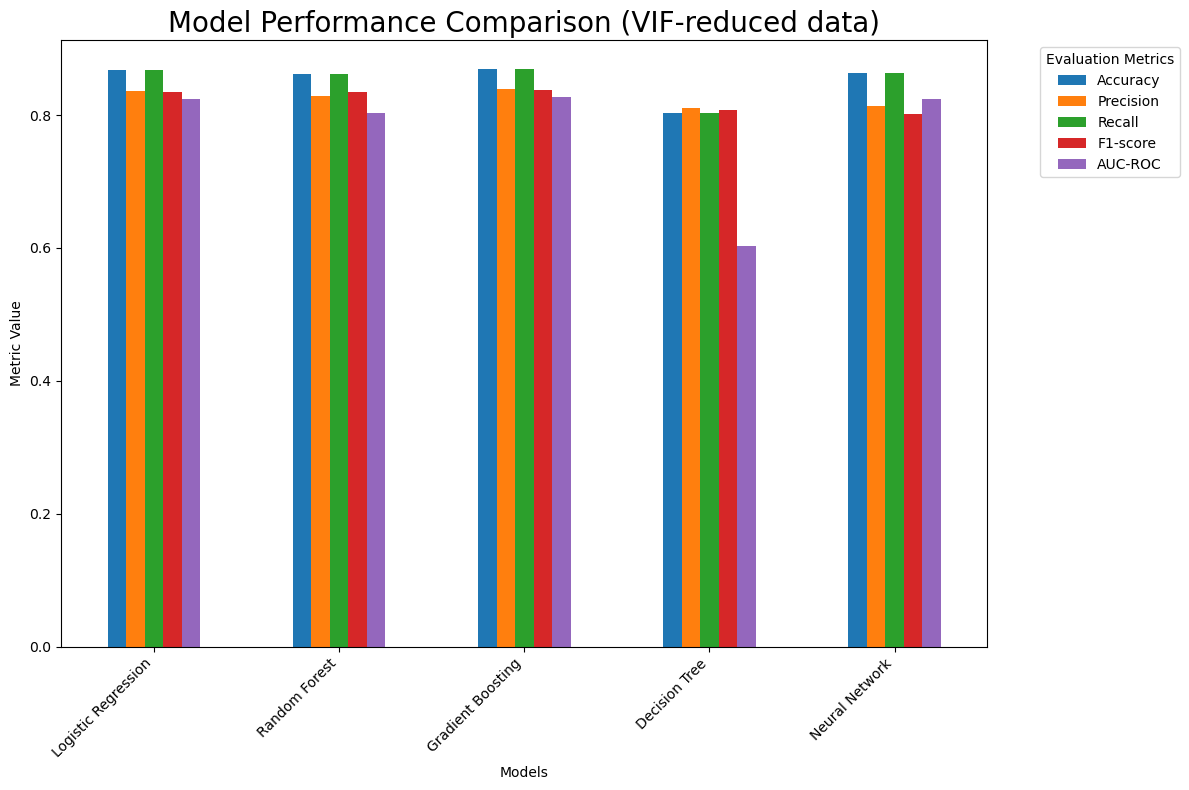


**Objective 4: Comprehensive Model Evaluation and Comparative Analysis - COMPLETED (using VIF-reduced data)**


In [14]:
# **Objective 4: Comprehensive Model Evaluation and Comparative Analysis**

print("\n**Objective 4: Comprehensive Model Evaluation and Comparative Analysis (using VIF-reduced data)**")

# --- Ensure the ground truth labels are available in the correct (1D binary) format ---
# Assuming y_test from the initial data split (Objective 1) is still the 1D array (0s and 1s)
y_test_orig = y_test.copy()
# Add a check to be sure
print(f"Unique values in y_test_orig: {np.unique(y_test_orig)}")
if not np.all(np.isin(np.unique(y_test_orig), [0, 1])):
    print("Warning: y_test_orig does not seem to contain only binary labels (0, 1). AUC calculation might be incorrect.")


evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
model_performance = {}

# Ensure trained_models dictionary is populated from previous steps
if not trained_models:
    print("Warning: trained_models dictionary is empty. Cannot evaluate models.")
else:
    for name, model in trained_models.items():
        print(f"\nEvaluating {name} with VIF-reduced data...")

        # --- Prediction Handling (Differs for Keras vs Scikit-learn) ---
        if name == 'Neural Network' and isinstance(model, Sequential): # Check if it's the Keras model
            # Keras model prediction (outputs probabilities for all classes due to softmax)
            y_pred_proba_all_classes_nn = model.predict(X_test_vif) # Shape: (n_samples, num_classes)
            y_pred = np.argmax(y_pred_proba_all_classes_nn, axis=1) # Convert probabilities to class labels (0, 1, or 2 - but we evaluate against 0/1)
            # For BINARY AUC, extract probability of the POSITIVE class (index 1)
            if y_pred_proba_all_classes_nn.shape[1] > 1:
                 y_pred_proba_positive = y_pred_proba_all_classes_nn[:, 1]
            else: # Should not happen with softmax > 1 class, but safe fallback
                 y_pred_proba_positive = y_pred_proba_all_classes_nn.flatten()
                 print(f"Warning: Keras model output has unexpected shape for {name}. Assuming binary sigmoid output.")

        elif hasattr(model, 'predict_proba'): # Check if it's a Scikit-learn model with predict_proba
            # Scikit-learn model prediction
            y_pred = model.predict(X_test_vif) # Gives class labels (0, 1, or 2)
            # For BINARY AUC, get probability of the POSITIVE class (class 1)
            y_pred_proba_positive = model.predict_proba(X_test_vif)[:, 1] # Shape: (n_samples,)
        else:
             print(f"Warning: Model '{name}' does not have standard predict or predict_proba methods. Skipping evaluation.")
             continue # Skip to the next model

        # --- Metric Calculation (Use original y_test_orig - the 1D binary labels) ---
        accuracy = accuracy_score(y_test_orig, y_pred)
        # Use weighted average for precision, recall, f1 (handles potential multi-class preds vs binary truth)
        try:
            # Ensure labels includes all possible predicted classes if different from truth
            labels_present = np.union1d(np.unique(y_test_orig), np.unique(y_pred))
            report = classification_report(y_test_orig, y_pred, output_dict=True, zero_division=0, labels=labels_present)
            precision_weighted = report['weighted avg']['precision']
            recall_weighted = report['weighted avg']['recall']
            f1_weighted = report['weighted avg']['f1-score']
        except ValueError as e:
             print(f"Warning: Could not generate classification report for {name}: {e}. Check predictions.")
             precision_weighted, recall_weighted, f1_weighted = 0, 0, 0 # Default values

        # Calculate BINARY AUC-ROC using the probability of the positive class
        try:
            # Ensure y_test_orig is truly binary for standard AUC calculation
            if not np.all(np.isin(np.unique(y_test_orig), [0, 1])):
                 raise ValueError("y_test_orig is not binary. Cannot calculate standard binary AUC.")
            auc_roc = roc_auc_score(y_test_orig, y_pred_proba_positive)
        except ValueError as e:
            print(f"Error calculating binary AUC for {name}: {e}")
            auc_roc = np.nan # Assign NaN on error
        except Exception as e: # Catch other potential errors
            print(f"Unexpected error calculating AUC for {name}: {e}")
            auc_roc = np.nan

        # --- Store Performance ---
        performance = {
            'Accuracy': accuracy,
            'Precision': precision_weighted,
            'Recall': recall_weighted,
            'F1-score': f1_weighted,
            'AUC-ROC': auc_roc
        }
        model_performance[name] = performance
        print(f"{name} Evaluation Metrics (VIF-reduced data): {performance}")

# --- Comparative Analysis - Tabular and Visual ---
if model_performance: # Only proceed if performance data exists
    performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
    print("\nComparative Model Performance (VIF-reduced data):")
    print(performance_df)

    # Plotting
    performance_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Model Performance Comparison (VIF-reduced data)', fontsize=20)
    plt.ylabel('Metric Value')
    plt.xlabel('Models')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Evaluation Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo model performance data to display.")


print("\n**Objective 4: Comprehensive Model Evaluation and Comparative Analysis - COMPLETED (using VIF-reduced data)**")

In [15]:
# --- Odds Ratios for Logistic Regression Coefficients ---
print("\n--- Odds Ratios for Logistic Regression Coefficients ---")

# Extract coefficients and feature names from the *tuned* Logistic Regression model - use best_lr_model
lr_model_tuned = trained_models['Logistic Regression'] # Get the tuned LR model again (for clarity)
coefficients = lr_model_tuned.coef_[0] # Extract coefficients from the TUNED model
feature_names = X_reduced_vif.columns # Get feature names from VIF-reduced data - use X_reduced_vif columns

odds_ratios_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
odds_ratios_lr['Odds_Ratio'] = np.exp(odds_ratios_lr['Coefficient']) # Exponentiate coefficients to get odds ratios
odds_ratios_lr = odds_ratios_lr.sort_values('Odds_Ratio', ascending=False)

print("\nOdds Ratios from Logistic Regression (Tuned Model):") 
display(odds_ratios_lr[['Feature', 'Coefficient', 'Odds_Ratio']])

print("\n--- Interpretation of Odds Ratios ---")
print("Odds Ratios quantify the change in the ODDS of having diabetes for a one-unit increase in the feature,")
print("holding all other features constant.")
print("Odds Ratio > 1: Feature increase -> increased odds of diabetes.")
print("Odds Ratio < 1: Feature increase -> decreased odds of diabetes.")
print("Odds Ratio = 1: Feature has no linear effect on the odds.")
print("Larger Odds Ratio (further from 1, in either direction) -> stronger influence on diabetes odds.")


--- Odds Ratios for Logistic Regression Coefficients ---

Odds Ratios from Logistic Regression (Tuned Model):


,Feature,Coefficient,Odds_Ratio
0,HighBP,0.767165,2.153653
1,HighChol,0.570158,1.768546
11,GenHlth,0.544212,1.723250
16,Age,0.444883,1.560308
2,BMI,0.425180,1.529866
15,Sex,0.249418,1.283279
5,HeartDiseaseorAttack,0.242021,1.273821
4,Stroke,0.158868,1.172183
18,BMI_Age_Interaction,0.129087,1.137789
14,DiffWalk,0.125469,1.133681



--- Interpretation of Odds Ratios ---
Odds Ratios quantify the change in the ODDS of having diabetes for a one-unit increase in the feature,
holding all other features constant.
Odds Ratio > 1: Feature increase -> increased odds of diabetes.
Odds Ratio < 1: Feature increase -> decreased odds of diabetes.
Odds Ratio = 1: Feature has no linear effect on the odds.
Larger Odds Ratio (further from 1, in either direction) -> stronger influence on diabetes odds.



**Objective 5: Actionable Insights and Data-Driven Recommendations**

--- Analyzing Feature Importance for Logistic Regression ---

Feature Importance from Logistic Regression (Coefficients):


,Feature,Coefficient,Abs_Coefficient
9,HvyAlcoholConsump,-0.778984,0.778984
0,HighBP,0.767165,0.767165
1,HighChol,0.570158,0.570158
11,GenHlth,0.544212,0.544212
16,Age,0.444883,0.444883
2,BMI,0.425180,0.425180
15,Sex,0.249418,0.249418
5,HeartDiseaseorAttack,0.242021,0.242021
17,Income,-0.164525,0.164525
4,Stroke,0.158868,0.158868



--- Interpretation of Logistic Regression Coefficients ---
Coefficients represent the linear influence on the log-odds of the positive class.
Larger absolute values indicate stronger influence.
Positive: Feature increase -> higher log-odds (higher diabetes likelihood).
Negative: Feature increase -> lower log-odds (lower diabetes likelihood).


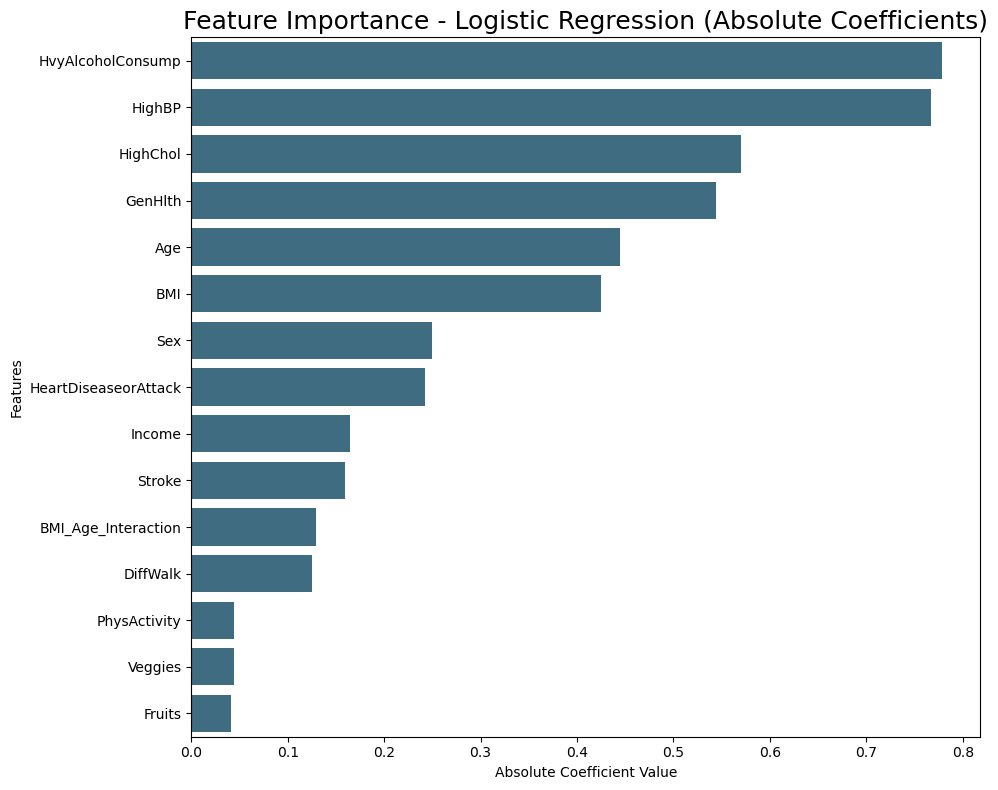


--- Interpretation (Top Features - Logistic Regression) ---
- HvyAlcoholConsump: Coefficient = -0.7790, Influence: decrease in likelihood.
- HighBP: Coefficient = 0.7672, Influence: increase in likelihood.
- HighChol: Coefficient = 0.5702, Influence: increase in likelihood.
- GenHlth: Coefficient = 0.5442, Influence: increase in likelihood.
- Age: Coefficient = 0.4449, Influence: increase in likelihood.
- BMI: Coefficient = 0.4252, Influence: increase in likelihood.
- Sex: Coefficient = 0.2494, Influence: increase in likelihood.
- HeartDiseaseorAttack: Coefficient = 0.2420, Influence: increase in likelihood.
- Income: Coefficient = -0.1645, Influence: decrease in likelihood.
- Stroke: Coefficient = 0.1589, Influence: increase in likelihood.
- BMI_Age_Interaction: Coefficient = 0.1291, Influence: increase in likelihood.
- DiffWalk: Coefficient = 0.1255, Influence: increase in likelihood.
- PhysActivity: Coefficient = -0.0443, Influence: decrease in likelihood.
- Veggies: Coefficient = 

,Feature,Importance,Std Dev
18,BMI_Age_Interaction,0.001172,0.000103
11,GenHlth,0.001110,0.000094
2,BMI,0.001101,0.000105
0,HighBP,0.000799,0.000090
16,Age,0.000568,0.000085
17,Income,0.000395,0.000123
1,HighChol,0.000382,0.000192
14,DiffWalk,0.000278,0.000010
5,HeartDiseaseorAttack,0.000269,0.000046
12,MentHlth,0.000176,0.000025



--- Interpretation of Manual Permutation Importance (Neural Network) ---
Importance scores represent the average decrease in the model's F1 score
when a feature's values are randomly shuffled.
Higher values indicate features the model relies on more heavily.
Standard Deviation shows the variability of importance across shuffles.


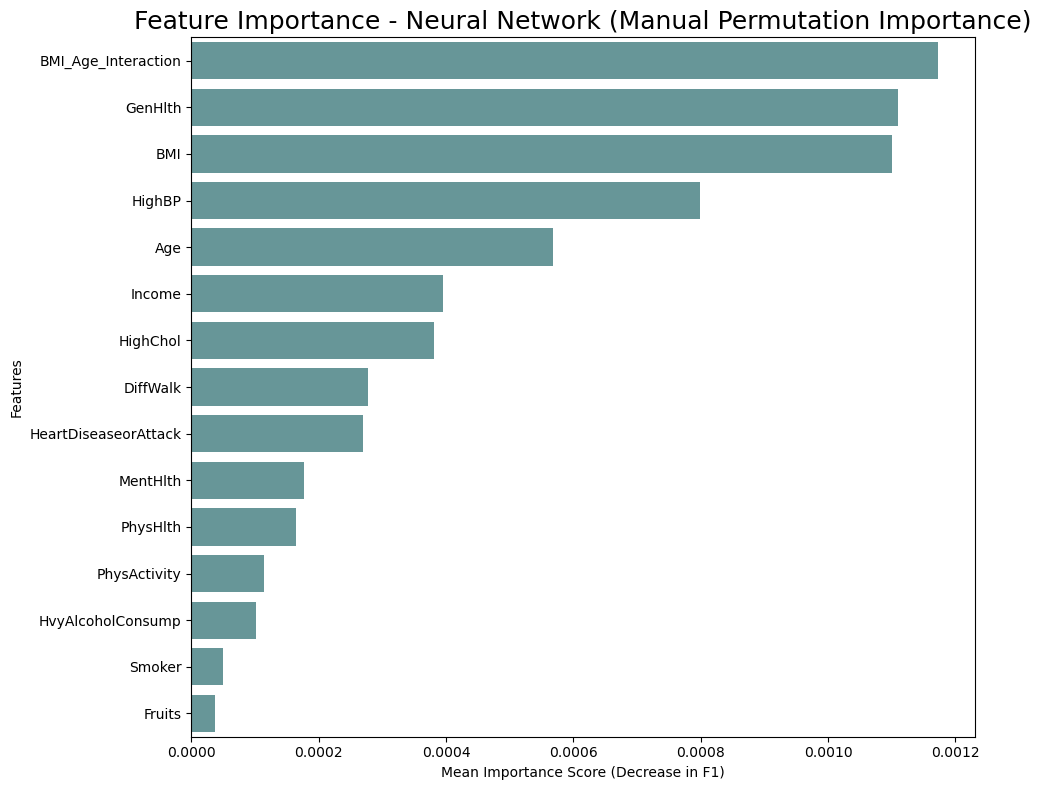


--- Interpretation (Top Features - Neural Network) ---
- BMI_Age_Interaction: Importance = 0.0012 (Avg F1 decrease)
- GenHlth: Importance = 0.0011 (Avg F1 decrease)
- BMI: Importance = 0.0011 (Avg F1 decrease)
- HighBP: Importance = 0.0008 (Avg F1 decrease)
- Age: Importance = 0.0006 (Avg F1 decrease)
- Income: Importance = 0.0004 (Avg F1 decrease)
- HighChol: Importance = 0.0004 (Avg F1 decrease)
- DiffWalk: Importance = 0.0003 (Avg F1 decrease)
- HeartDiseaseorAttack: Importance = 0.0003 (Avg F1 decrease)
- MentHlth: Importance = 0.0002 (Avg F1 decrease)
- PhysHlth: Importance = 0.0002 (Avg F1 decrease)
- PhysActivity: Importance = 0.0001 (Avg F1 decrease)
- HvyAlcoholConsump: Importance = 0.0001 (Avg F1 decrease)
- Smoker: Importance = 0.0001 (Avg F1 decrease)
- Fruits: Importance = 0.0000 (Avg F1 decrease)
- NoDocbcCost: Importance = 0.0000 (Avg F1 decrease)
- Sex: Importance = 0.0000 (Avg F1 decrease)
- Veggies: Importance = 0.0000 (Avg F1 decrease)
- Stroke: Importance = -0.0000

,Feature,Importance
18,BMI_Age_Interaction,0.120153
2,BMI,0.115531
0,HighBP,0.099904
17,Income,0.098927
11,GenHlth,0.093103
13,PhysHlth,0.090657
12,MentHlth,0.070905
16,Age,0.062552
3,Smoker,0.030490
7,Fruits,0.029782



--- Interpretation of Random Forest Importance ---
Importance based on mean decrease in impurity (Gini) across all trees.
Higher values indicate features that are more important for partitioning the data.


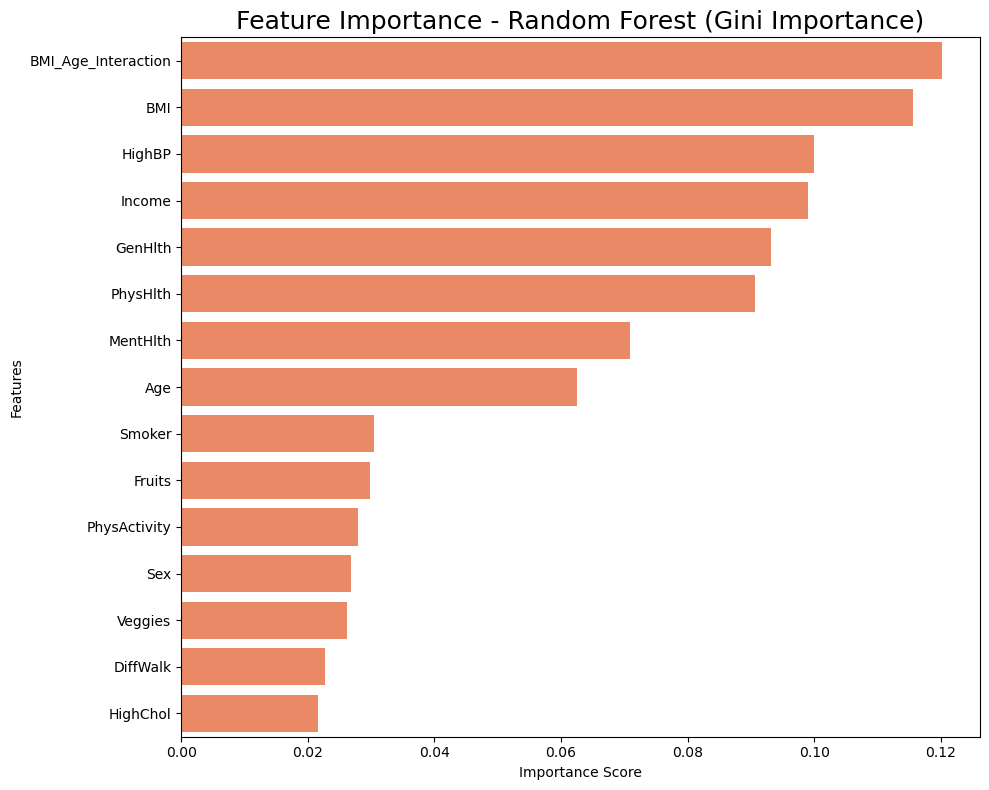


--- Interpretation (Top Features - Random Forest) ---
- BMI_Age_Interaction: Importance = 0.1202
- BMI: Importance = 0.1155
- HighBP: Importance = 0.0999
- Income: Importance = 0.0989
- GenHlth: Importance = 0.0931
- PhysHlth: Importance = 0.0907
- MentHlth: Importance = 0.0709
- Age: Importance = 0.0626
- Smoker: Importance = 0.0305
- Fruits: Importance = 0.0298
- PhysActivity: Importance = 0.0280
- Sex: Importance = 0.0269
- Veggies: Importance = 0.0263
- DiffWalk: Importance = 0.0227
- HighChol: Importance = 0.0215
- HeartDiseaseorAttack: Importance = 0.0203
- NoDocbcCost: Importance = 0.0169
- Stroke: Importance = 0.0159
- HvyAlcoholConsump: Importance = 0.0095

--- Analyzing Feature Importance for Gradient Boosting ---

Feature Importance from Gradient Boosting:


,Feature,Importance
11,GenHlth,0.273180
0,HighBP,0.269629
2,BMI,0.159410
1,HighChol,0.074996
16,Age,0.068004
14,DiffWalk,0.054234
18,BMI_Age_Interaction,0.035413
5,HeartDiseaseorAttack,0.029672
17,Income,0.010908
9,HvyAlcoholConsump,0.010875



--- Interpretation of Gradient Boosting Importance ---
Importance based on mean decrease in impurity or similar metric used during boosting.


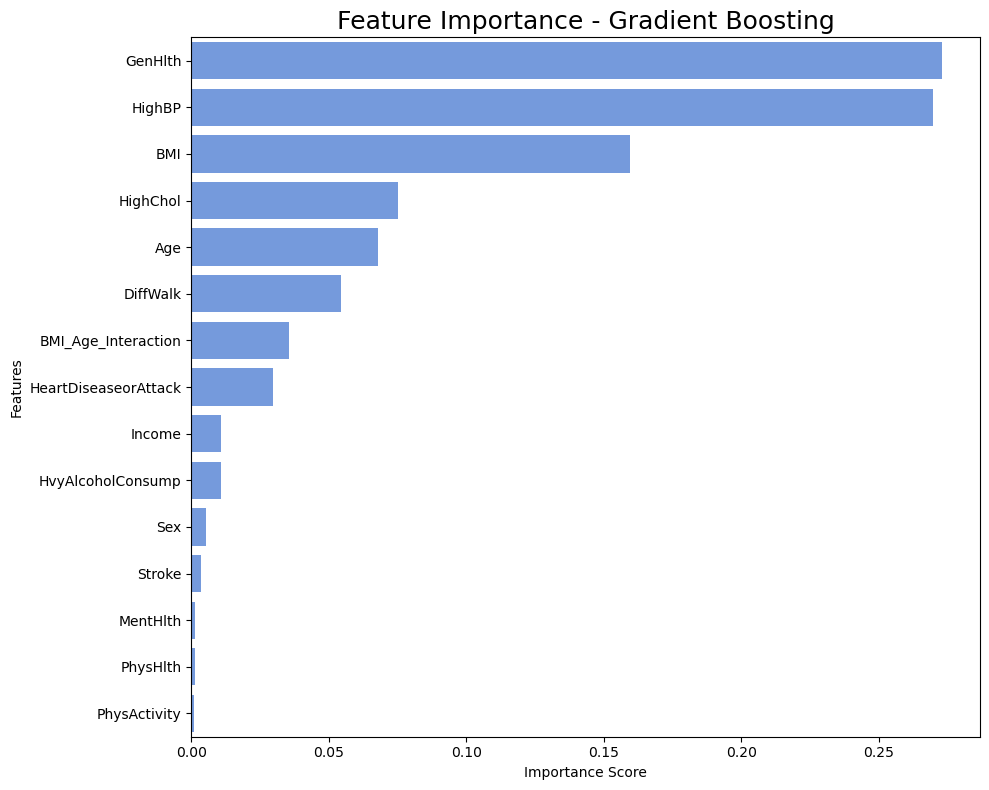


--- Interpretation (Top Features - Gradient Boosting) ---
- GenHlth: Importance = 0.2732
- HighBP: Importance = 0.2696
- BMI: Importance = 0.1594
- HighChol: Importance = 0.0750
- Age: Importance = 0.0680
- DiffWalk: Importance = 0.0542
- BMI_Age_Interaction: Importance = 0.0354
- HeartDiseaseorAttack: Importance = 0.0297
- Income: Importance = 0.0109
- HvyAlcoholConsump: Importance = 0.0109
- Sex: Importance = 0.0055
- Stroke: Importance = 0.0035
- MentHlth: Importance = 0.0013
- PhysHlth: Importance = 0.0013
- PhysActivity: Importance = 0.0008
- Fruits: Importance = 0.0005
- Veggies: Importance = 0.0004
- NoDocbcCost: Importance = 0.0002
- Smoker: Importance = 0.0002

**Objective 5: Actionable Insights and Data-Driven Recommendations - COMPLETED**


In [16]:
# Objective 5: Actionable Insights and Data-Driven Recommendations

# --- Feature Importance for Logistic Regression (Keep Original - Assuming it worked) ---

print("\n**Objective 5: Actionable Insights and Data-Driven Recommendations**")
print("\n--- Analyzing Feature Importance for Logistic Regression ---")

if 'Logistic Regression' in trained_models:
    lr_model = trained_models['Logistic Regression']

    # --- Determine feature names (assuming VIF reduction was done) ---
    if 'X_train_vif' in locals() and hasattr(X_train_vif, 'columns'):
        feature_names = X_train_vif.columns
    elif 'X_reduced_corr' in locals() and hasattr(X_reduced_corr, 'columns'):
        feature_names = X_reduced_corr.columns # Fallback
    elif 'X_train' in locals() and hasattr(X_train, 'columns'):
        feature_names = X_train.columns # Fallback to original
    else:
        print("\nWarning: Could not determine feature names. Cannot calculate importance.")
        feature_names = None

    if feature_names is not None:
        # --- Calculate and Display Logistic Regression Coefficients ---
        try:
            if hasattr(lr_model, 'coef_'):
                coefficients = lr_model.coef_[0]
                feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
                feature_importance_lr['Abs_Coefficient'] = feature_importance_lr['Coefficient'].abs()
                feature_importance_lr = feature_importance_lr.sort_values('Abs_Coefficient', ascending=False)

                print("\nFeature Importance from Logistic Regression (Coefficients):")
                display(feature_importance_lr[['Feature', 'Coefficient', 'Abs_Coefficient']])
                print("\n--- Interpretation of Logistic Regression Coefficients ---")
                print("Coefficients represent the linear influence on the log-odds of the positive class.")
                print("Larger absolute values indicate stronger influence.")
                print("Positive: Feature increase -> higher log-odds (higher diabetes likelihood).")
                print("Negative: Feature increase -> lower log-odds (lower diabetes likelihood).")

                # --- Bar Plot for Logistic Regression ---
                plt.figure(figsize=(10, 8))
                num_features_to_plot = min(15, len(feature_importance_lr))
                top_features_lr = feature_importance_lr.head(num_features_to_plot)
                sns.barplot(x=top_features_lr['Abs_Coefficient'], y=top_features_lr['Feature'], color="#34708C")
                plt.title('Feature Importance - Logistic Regression (Absolute Coefficients)', fontsize=18)
                plt.xlabel('Absolute Coefficient Value')
                plt.ylabel('Features')
                plt.tight_layout()
                plt.show()

                # --- Top Features Interpretation (LR) ---
                print("\n--- Interpretation (Top Features - Logistic Regression) ---")
                top_n = min(19, len(feature_importance_lr))
                for index, row in feature_importance_lr.head(top_n).iterrows():
                    direction = "increase" if row['Coefficient'] > 0 else "decrease"
                    print(f"- {row['Feature']}: Coefficient = {row['Coefficient']:.4f}, Influence: {direction} in likelihood.")
            else:
                print("\nLogistic Regression model does not have 'coef_' attribute.")

        except Exception as e:
            print(f"\nError processing Logistic Regression importance: {e}")
    else:
        print("\nSkipping Logistic Regression importance calculation (feature names missing).")
else:
    print("\nWarning: Logistic Regression model not found in trained_models.")


# --- Feature Importance for Neural Network (Manual Permutation Importance) ---
print("\n--- Analyzing Feature Importance for Neural Network (Manual Permutation) ---")

if 'Neural Network' in trained_models:
    nn_model_keras = trained_models['Neural Network'] # The actual Keras Sequential model

    # --- Reuse feature names if determined earlier ---
    if feature_names is not None:
        print("Calculating Manual Permutation Importance for Neural Network (may take a few moments)...")
        try:
            # Ensure necessary data exists
            if 'X_test_vif' not in locals() or 'y_test_orig' not in locals():
                 raise NameError("Required data (X_test_vif or y_test_orig) not found for Manual Permutation Importance.")

            # Ensure y_test_orig is 1D
            if y_test_orig.ndim != 1:
                raise ValueError("y_test_orig must be a 1D array for scoring.")

            n_repeats = 5 # Number of shuffles per feature
            baseline_predictions = nn_model_keras.predict(X_test_vif)
            baseline_pred_classes = np.argmax(baseline_predictions, axis=1)
            baseline_score = f1_score(y_test_orig, baseline_pred_classes, average='weighted', zero_division=0)
            print(f"Baseline F1 Score: {baseline_score:.4f}")

            importances = []
            all_permuted_scores = [] # To calculate standard deviation

            # Get the actual NumPy array for features for efficient shuffling
            X_test_vif_values = X_test_vif.values if isinstance(X_test_vif, pd.DataFrame) else X_test_vif

            for i in range(X_test_vif_values.shape[1]): # Loop through features by index
                feature_name = feature_names[i]
                print(f"  Shuffling feature: {feature_name} ({i+1}/{X_test_vif_values.shape[1]})")
                permuted_scores_for_feature = []
                for n in range(n_repeats):
                    X_test_permuted = X_test_vif_values.copy()
                    # Shuffle only the i-th column
                    np.random.shuffle(X_test_permuted[:, i])

                    # Predict with the shuffled data
                    permuted_predictions = nn_model_keras.predict(X_test_permuted, verbose=0) # Suppress predict verbosity
                    permuted_pred_classes = np.argmax(permuted_predictions, axis=1)

                    # Calculate score with shuffled data
                    permuted_score = f1_score(y_test_orig, permuted_pred_classes, average='weighted', zero_division=0)
                    permuted_scores_for_feature.append(permuted_score)

                # Calculate importance (decrease from baseline)
                score_decrease = baseline_score - np.mean(permuted_scores_for_feature)
                importances.append(score_decrease)
                all_permuted_scores.append(permuted_scores_for_feature) # Store all scores for std dev

            # Calculate standard deviation of importances across repeats
            importances_std = np.std(baseline_score - np.array(all_permuted_scores), axis=1)

            # --- Process and Display Results ---
            feature_importance_nn = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances,
                'Std Dev': importances_std
            })
            feature_importance_nn = feature_importance_nn.sort_values('Importance', ascending=False)

            print("\nFeature Importance from Neural Network (Manual Permutation Importance):")
            display(feature_importance_nn[['Feature', 'Importance', 'Std Dev']])
            print("\n--- Interpretation of Manual Permutation Importance (Neural Network) ---")
            print("Importance scores represent the average decrease in the model's F1 score")
            print("when a feature's values are randomly shuffled.")
            print("Higher values indicate features the model relies on more heavily.")
            print("Standard Deviation shows the variability of importance across shuffles.")

            # --- Bar Plot for Neural Network ---
            plt.figure(figsize=(10, 8))
            num_features_to_plot_nn = min(15, len(feature_importance_nn))
            top_features_nn = feature_importance_nn.head(num_features_to_plot_nn)
            sns.barplot(x=top_features_nn['Importance'], y=top_features_nn['Feature'], color="#5F9EA0") # Different color
            plt.title('Feature Importance - Neural Network (Manual Permutation Importance)', fontsize=18)
            plt.xlabel('Mean Importance Score (Decrease in F1)')
            plt.ylabel('Features')
            plt.tight_layout()
            plt.show()

            # --- Top Features Interpretation (NN) ---
            print("\n--- Interpretation (Top Features - Neural Network) ---")
            top_n_nn = min(19, len(feature_importance_nn))
            for index, row in feature_importance_nn.head(top_n_nn).iterrows():
                 print(f"- {row['Feature']}: Importance = {row['Importance']:.4f} (Avg F1 decrease)")

        except Exception as e:
            print(f"\nError calculating Manual Permutation Importance for Neural Network: {e}")
            print("Check that X_test_vif/y_test_orig are correctly defined and formatted.")

    else:
        print("\nSkipping Neural Network importance calculation (feature names missing).")

else:
    print("\nWarning: Neural Network model not found in trained_models.")


# --- Feature Importance for Other Tree-Based Models (RF & GB - Assuming these worked) ---
# (Code for RF and GB importance remains the same as in the previous response)

print("\n--- Analyzing Feature Importance for Random Forest ---")
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    if feature_names is not None:
        try:
            if hasattr(rf_model, 'feature_importances_'):
                importances_rf = rf_model.feature_importances_
                feature_importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
                feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)

                print("\nFeature Importance from Random Forest (Gini Importance):")
                display(feature_importance_rf)
                print("\n--- Interpretation of Random Forest Importance ---")
                print("Importance based on mean decrease in impurity (Gini) across all trees.")
                print("Higher values indicate features that are more important for partitioning the data.")

                # --- Bar Plot for Random Forest ---
                plt.figure(figsize=(10, 8))
                num_features_to_plot_rf = min(15, len(feature_importance_rf))
                top_features_rf = feature_importance_rf.head(num_features_to_plot_rf)
                sns.barplot(x=top_features_rf['Importance'], y=top_features_rf['Feature'], color="#FF7F50")
                plt.title('Feature Importance - Random Forest (Gini Importance)', fontsize=18)
                plt.xlabel('Importance Score')
                plt.ylabel('Features')
                plt.tight_layout()
                plt.show()

                # --- Top Features Interpretation (RF) ---
                print("\n--- Interpretation (Top Features - Random Forest) ---")
                top_n_rf = min(19, len(feature_importance_rf))
                for index, row in feature_importance_rf.head(top_n_rf).iterrows():
                     print(f"- {row['Feature']}: Importance = {row['Importance']:.4f}")
            else:
                 print("\nRandom Forest model does not have 'feature_importances_' attribute.")

        except Exception as e:
            print(f"\nError processing Random Forest importance: {e}")
    else:
        print("\nSkipping Random Forest importance calculation (feature names missing).")
else:
    print("\nWarning: Random Forest model not found in trained_models.")

print("\n--- Analyzing Feature Importance for Gradient Boosting ---")
if 'Gradient Boosting' in trained_models:
    gb_model = trained_models['Gradient Boosting']
    if feature_names is not None:
        try:
             if hasattr(gb_model, 'feature_importances_'):
                importances_gb = gb_model.feature_importances_
                feature_importance_gb = pd.DataFrame({'Feature': feature_names, 'Importance': importances_gb})
                feature_importance_gb = feature_importance_gb.sort_values('Importance', ascending=False)

                print("\nFeature Importance from Gradient Boosting:")
                display(feature_importance_gb)
                print("\n--- Interpretation of Gradient Boosting Importance ---")
                print("Importance based on mean decrease in impurity or similar metric used during boosting.")

                # --- Bar Plot for Gradient Boosting ---
                plt.figure(figsize=(10, 8))
                num_features_to_plot_gb = min(15, len(feature_importance_gb))
                top_features_gb = feature_importance_gb.head(num_features_to_plot_gb)
                sns.barplot(x=top_features_gb['Importance'], y=top_features_gb['Feature'], color="#6495ED")
                plt.title('Feature Importance - Gradient Boosting', fontsize=18)
                plt.xlabel('Importance Score')
                plt.ylabel('Features')
                plt.tight_layout()
                plt.show()

                # --- Top Features Interpretation (GB) ---
                print("\n--- Interpretation (Top Features - Gradient Boosting) ---")
                top_n_gb = min(19, len(feature_importance_gb))
                for index, row in feature_importance_gb.head(top_n_gb).iterrows():
                     print(f"- {row['Feature']}: Importance = {row['Importance']:.4f}")
             else:
                 print("\nGradient Boosting model does not have 'feature_importances_' attribute.")

        except Exception as e:
             print(f"\nError processing Gradient Boosting importance: {e}")
    else:
        print("\nSkipping Gradient Boosting importance calculation (feature names missing).")
else:
    print("\nWarning: Gradient Boosting model not found in trained_models.")


print("\n**Objective 5: Actionable Insights and Data-Driven Recommendations - COMPLETED**")

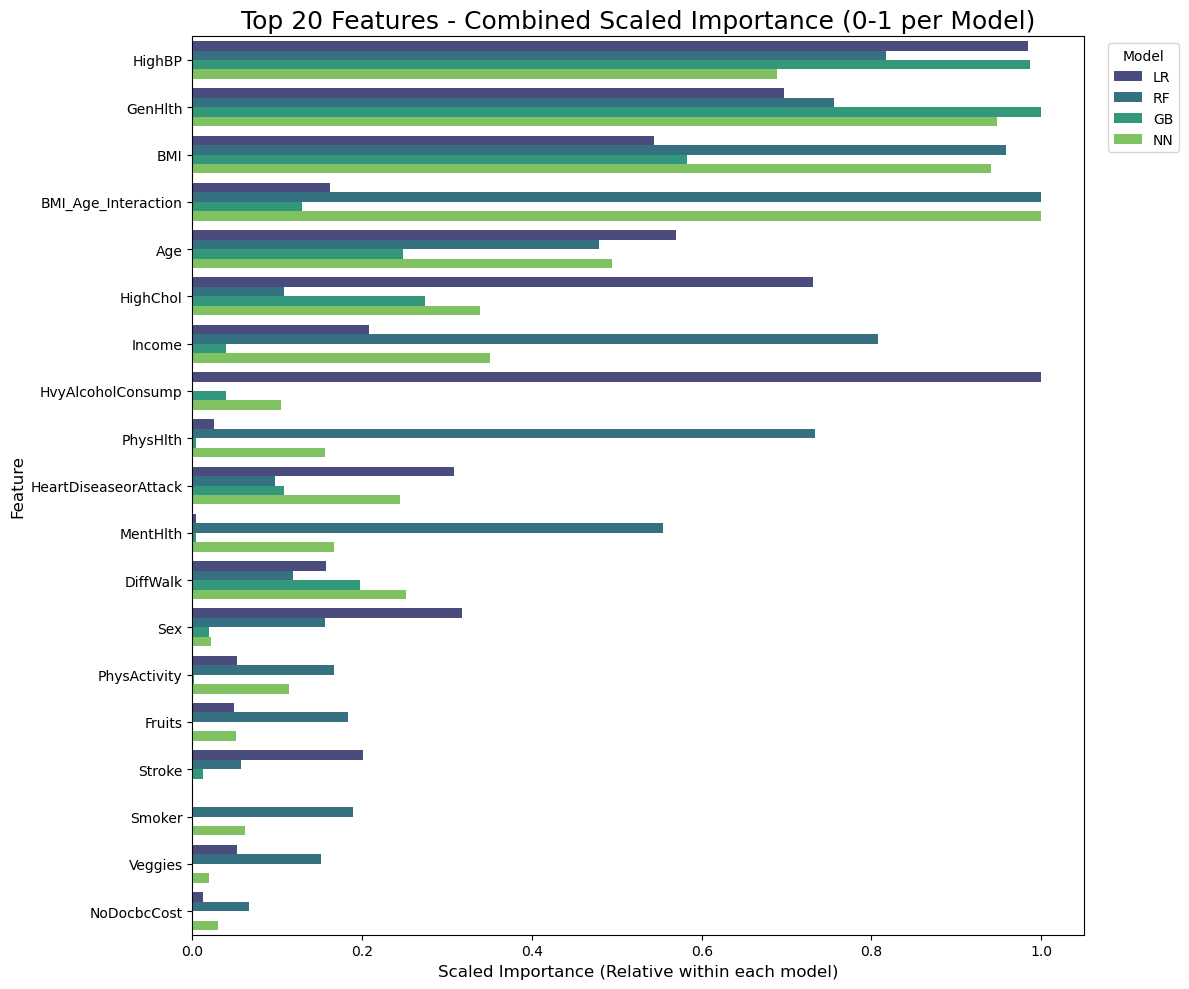


--- Interpretation of Combined Scaled Importance ---
This plot shows the *relative* importance of features *within each model*, scaled to a 0-1 range.
A high bar indicates the feature is important *for that specific model* compared to its other features.
It does *not* allow direct comparison of absolute importance *across different model types*.
Features consistently ranked high across models are likely strong predictors overall.

**Objective 5: Actionable Insights and Data-Driven Recommendations - COMPLETED**


In [17]:
# Objective 5: Actionable Insights and Data-Driven Recommendations

# Check if all importance dataframes were successfully created
required_dfs = {
    'LR': 'feature_importance_lr' if 'feature_importance_lr' in locals() else None,
    'RF': 'feature_importance_rf' if 'feature_importance_rf' in locals() else None,
    'GB': 'feature_importance_gb' if 'feature_importance_gb' in locals() else None,
    'NN': 'feature_importance_nn' if 'feature_importance_nn' in locals() else None
}

# Filter out models where importance calculation failed
valid_importance_dfs = {name: globals()[df_name] for name, df_name in required_dfs.items() if df_name is not None}

if len(valid_importance_dfs) < 2:
    print("Cannot create combined plot: Need feature importance calculated for at least two models.")
else:
    # --- Merge Importance DataFrames ---
    combined_importance_df = None
    for i, (name, df) in enumerate(valid_importance_dfs.items()):
        # Select and rename columns
        if name == 'LR':
            importance_col = 'Abs_Coefficient'
            if importance_col not in df.columns: continue # Skip if column missing
            current_df = df[['Feature', importance_col]].rename(columns={importance_col: f'{name}_Importance'})
        else:
            importance_col = 'Importance'
            if importance_col not in df.columns: continue # Skip if column missing
            current_df = df[['Feature', importance_col]].rename(columns={importance_col: f'{name}_Importance'})

        # Merge
        if combined_importance_df is None:
            combined_importance_df = current_df
        else:
            combined_importance_df = pd.merge(combined_importance_df, current_df, on='Feature', how='outer')

    # Fill NaN values with 0 (features not important for a model)
    combined_importance_df = combined_importance_df.fillna(0)

    # --- Normalize Importance Scores (Min-Max Scaling per Model) ---
    scaled_cols = []
    for name in valid_importance_dfs.keys():
        col_name = f'{name}_Importance'
        scaled_col_name = f'{name}_Scaled'
        scaled_cols.append(scaled_col_name)

        min_val = combined_importance_df[col_name].min()
        max_val = combined_importance_df[col_name].max()

        if max_val - min_val > 0: # Avoid division by zero
            combined_importance_df[scaled_col_name] = (combined_importance_df[col_name] - min_val) / (max_val - min_val)
        else:
            combined_importance_df[scaled_col_name] = 0 # All importances were the same (likely 0)

    # --- Calculate Average Scaled Importance and Sort ---
    combined_importance_df['Avg_Scaled_Importance'] = combined_importance_df[scaled_cols].mean(axis=1)
    combined_importance_df = combined_importance_df.sort_values('Avg_Scaled_Importance', ascending=False)

    # --- Prepare for Plotting (Select Top N Features and Melt) ---
    num_features_to_plot_combined = 20 # Adjust as needed
    top_features_combined = combined_importance_df.head(num_features_to_plot_combined)

    # Melt the DataFrame for Seaborn barplot
    melted_df = pd.melt(
        top_features_combined,
        id_vars=['Feature', 'Avg_Scaled_Importance'], # Keep Feature and Avg Importance
        value_vars=scaled_cols,      # Columns to melt are the scaled ones
        var_name='Model',            # New column for model names
        value_name='Scaled Importance' # New column for scaled importance values
    )

    # Clean up model names in the 'Model' column
    melted_df['Model'] = melted_df['Model'].str.replace('_Scaled', '')

    # Sort features based on Avg_Scaled_Importance for plotting order
    feature_order = top_features_combined['Feature'].tolist()

    # --- Create Combined Plot ---
    plt.figure(figsize=(12, 10)) # Adjust size as needed
    sns.barplot(
        data=melted_df,
        x='Scaled Importance',
        y='Feature',
        hue='Model',
        order=feature_order, # Ensure features are ordered by average importance
        palette='viridis'    # Choose a suitable color palette
    )
    plt.title(f'Top {num_features_to_plot_combined} Features - Combined Scaled Importance (0-1 per Model)', fontsize=18)
    plt.xlabel('Scaled Importance (Relative within each model)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    print("\n--- Interpretation of Combined Scaled Importance ---")
    print("This plot shows the *relative* importance of features *within each model*, scaled to a 0-1 range.")
    print("A high bar indicates the feature is important *for that specific model* compared to its other features.")
    print("It does *not* allow direct comparison of absolute importance *across different model types*.")
    print("Features consistently ranked high across models are likely strong predictors overall.")

print("\n**Objective 5: Actionable Insights and Data-Driven Recommendations - COMPLETED**")
# Ensure the final print statement reflects the completion of all parts


--- Combined Calibration Curve for All Models ---
  Calculating calibration for: Logistic Regression
  Calculating calibration for: Random Forest
  Calculating calibration for: Gradient Boosting
  Calculating calibration for: Decision Tree
  Calculating calibration for: Neural Network
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step


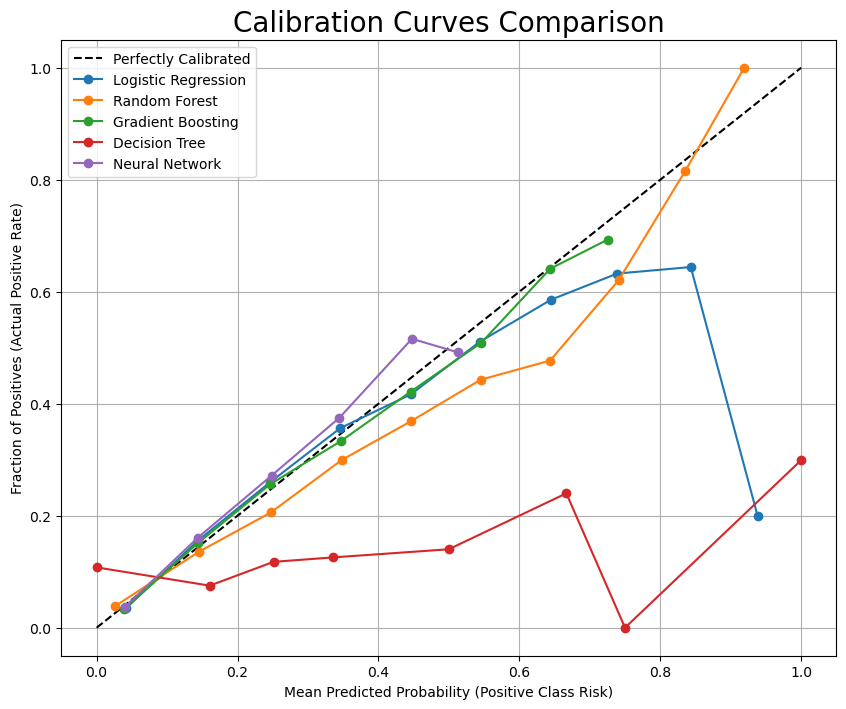


--- Interpretation of Combined Calibration Curve ---
Calibration curve shows how well-calibrated the predicted probabilities are for each model.
Ideally, curves should follow the diagonal black dashed line (perfect calibration).
Curves above diagonal: Models tend to under-predict probabilities (probabilities are too low).
Curves below diagonal: Models tend to over-predict probabilities (probabilities are too high).
Assess how close each model's curve is to the diagonal.


In [18]:
# --- Combined Calibration Curve for All Models ---
print("\n--- Combined Calibration Curve for All Models ---")
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # Ensure Sequential is imported
import numpy as np # Ensure numpy is imported

# Check if necessary variables exist
if 'trained_models' not in locals() or not trained_models:
    print("Error: 'trained_models' dictionary not found or is empty.")
elif 'X_test_vif' not in locals():
    print("Error: 'X_test_vif' not found.")
elif 'y_test_orig' not in locals():
    print("Error: 'y_test_orig' not found. Make sure original 1D test labels are preserved.")
elif y_test_orig.ndim != 1 or not np.all(np.isin(np.unique(y_test_orig), [0, 1])):
     print(f"Error: y_test_orig must be a 1D array with only binary (0, 1) labels. Found unique values: {np.unique(y_test_orig)}")
else:
    plt.figure(figsize=(10, 8)) # Create a single figure

    # Plot the perfectly calibrated line first (diagonal)
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated', color='black')

    calibration_data = {} # To store data for potential later use if needed

    # Iterate through each trained model
    for name, model in trained_models.items():
        print(f"  Calculating calibration for: {name}")
        try:
            # --- Get probabilities for the POSITIVE class ---
            if isinstance(model, Sequential): # Check if it's the Keras model
                y_pred_proba_all = model.predict(X_test_vif)
                if y_pred_proba_all.shape[1] > 1: # Softmax output
                     y_pred_proba_positive = y_pred_proba_all[:, 1] # Probability of class 1
                elif y_pred_proba_all.shape[1] == 1: # Sigmoid output (just in case)
                    y_pred_proba_positive = y_pred_proba_all.flatten()
                else: # Handle unexpected shape
                     print(f"    Warning: Unexpected prediction shape {y_pred_proba_all.shape} for Keras model {name}. Skipping.")
                     continue
            elif hasattr(model, 'predict_proba'): # Scikit-learn model
                y_pred_proba_positive = model.predict_proba(X_test_vif)[:, 1]
            else:
                print(f"    Warning: Model '{name}' does not have predict_proba or standard predict. Skipping.")
                continue

            # --- Calculate calibration curve points ---
            # Use original 1D binary labels (y_test_orig)
            prob_true, prob_pred = calibration_curve(y_test_orig, y_pred_proba_positive, n_bins=10, strategy='uniform')
            calibration_data[name] = (prob_true, prob_pred)

            # --- Plot this model's curve ---
            plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label=name) # Use model name as label

        except Exception as e:
            print(f"    Error calculating calibration for {name}: {e}")

    # --- Finalize the plot ---
    plt.xlabel('Mean Predicted Probability (Positive Class Risk)')
    plt.ylabel('Fraction of Positives (Actual Positive Rate)')
    plt.title('Calibration Curves Comparison', fontsize=20)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    print("\n--- Interpretation of Combined Calibration Curve ---")
    print("Calibration curve shows how well-calibrated the predicted probabilities are for each model.")
    print("Ideally, curves should follow the diagonal black dashed line (perfect calibration).")
    print("Curves above diagonal: Models tend to under-predict probabilities (probabilities are too low).")
    print("Curves below diagonal: Models tend to over-predict probabilities (probabilities are too high).")
    print("Assess how close each model's curve is to the diagonal.")


**Objective 6: Effective Communication and Visualization of Findings (using VIF-reduced data)**

--- Generating Combined ROC Curve ---
  Calculating ROC for: Logistic Regression
  Calculating ROC for: Random Forest
  Calculating ROC for: Gradient Boosting
  Calculating ROC for: Decision Tree
  Calculating ROC for: Neural Network


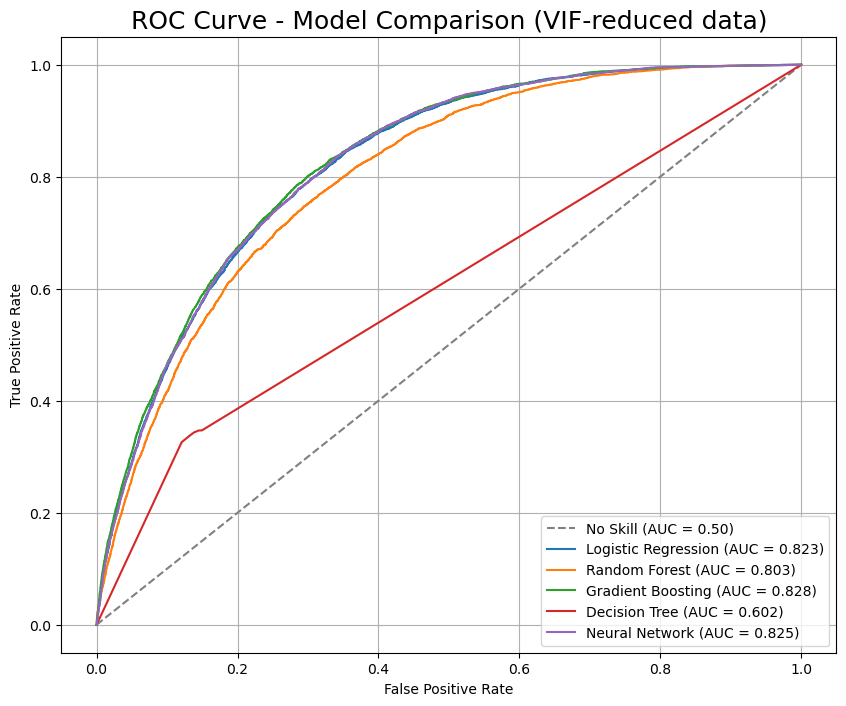


--- Comparative Model Performance Summary ---


,Accuracy,Precision,Recall,F1-score,AUC-ROC
Logistic Regression,0.867445,0.835481,0.867445,0.834772,0.823493
Random Forest,0.861505,0.828025,0.861505,0.834254,0.802718
Gradient Boosting,0.869021,0.839101,0.869021,0.837746,0.827785
Decision Tree,0.803532,0.810982,0.803532,0.807134,0.602289
Neural Network,0.863476,0.813205,0.863476,0.801695,0.824584



--- Generating Confusion Matrices ---
  Calculating Confusion Matrix for: Logistic Regression
  Calculating Confusion Matrix for: Random Forest
  Calculating Confusion Matrix for: Gradient Boosting
  Calculating Confusion Matrix for: Decision Tree
  Calculating Confusion Matrix for: Neural Network


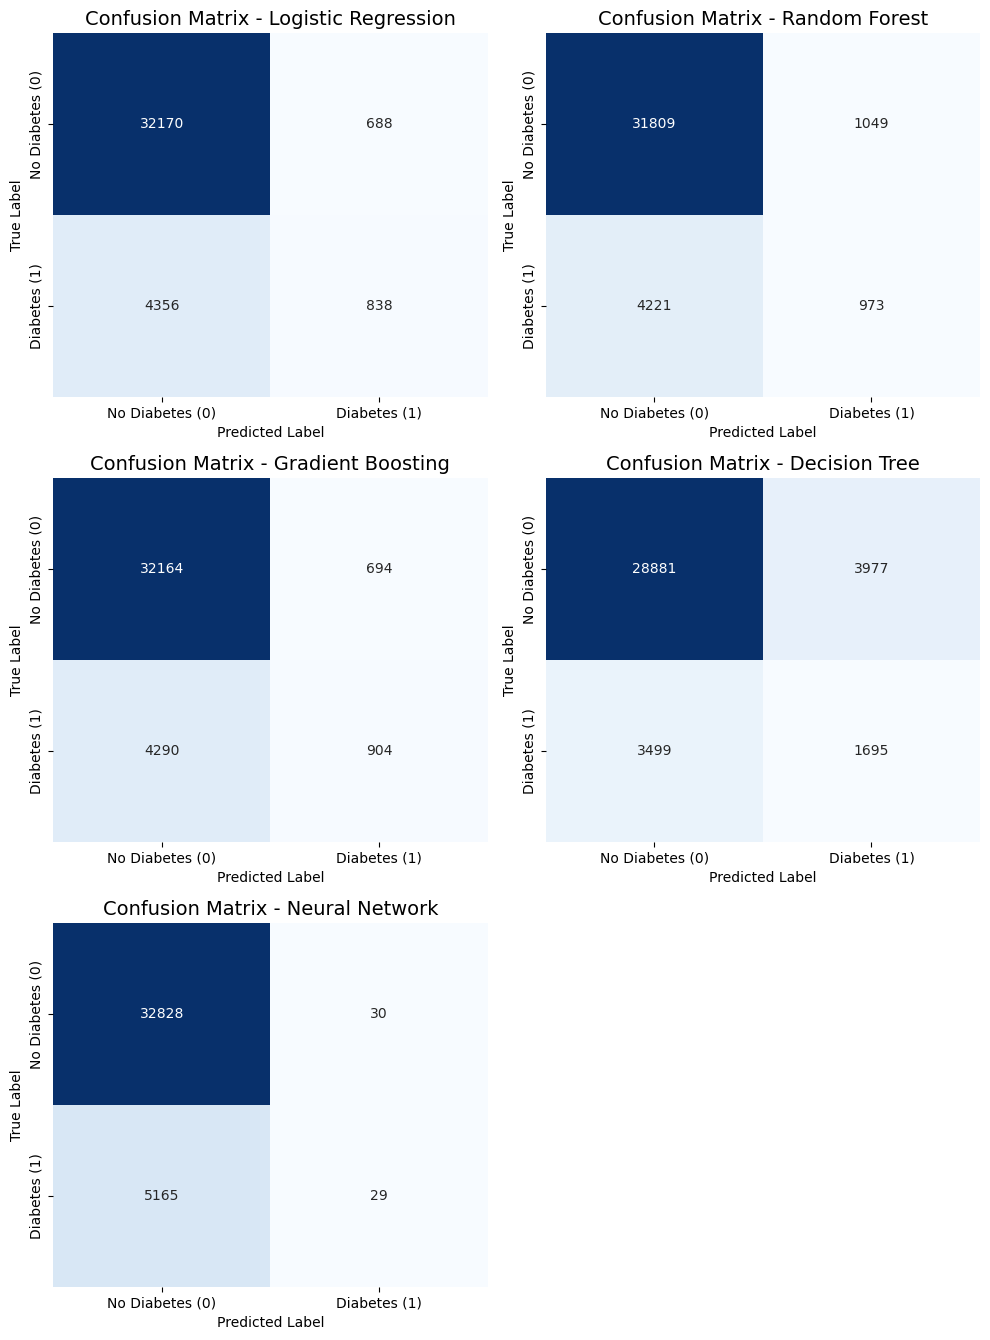


**Objective 6: Effective Communication and Visualization of Findings - COMPLETED (using VIF-reduced data)**


In [19]:
# **Objective 6: Effective Communication and Visualization of Findings**

print("\n**Objective 6: Effective Communication and Visualization of Findings (using VIF-reduced data)**")

# --- Ensure the necessary data is available ---
# These should be defined from previous steps
if 'trained_models' not in locals() or not trained_models:
    print("Error: 'trained_models' dictionary not found or is empty.")
    # Optionally exit or handle this error appropriately
elif 'X_test_vif' not in locals():
    print("Error: 'X_test_vif' (VIF-reduced test features) not found.")
elif 'y_test_orig' not in locals():
    # Define y_test_orig if it wasn't explicitly preserved in this scope
    # Assuming y_test is the original 1D array from the initial split
    if 'y_test' in locals() and y_test.ndim == 1:
         y_test_orig = y_test.copy()
         print("Defined y_test_orig from y_test.")
    else:
        print("Error: 'y_test_orig' (original 1D test labels) not found or y_test is not 1D. Please define it.")
        # Optionally exit or handle this error appropriately
elif y_test_orig.ndim != 1 or not np.all(np.isin(np.unique(y_test_orig), [0, 1])):
    print(f"Error: 'y_test_orig' is not 1D or not binary. Found unique values: {np.unique(y_test_orig)}. Cannot proceed.")
    # Optionally exit or handle this error appropriately
else: # Proceed if data looks okay

    # --- ROC Curve Visualization for All Models ---
    print("\n--- Generating Combined ROC Curve ---")
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill (AUC = 0.50)', color='grey') # Baseline

    roc_data = {} # Store ROC data if needed later

    # Iterate through models to get probabilities and plot ROC
    for name, model in trained_models.items():
        print(f"  Calculating ROC for: {name}")
        y_pred_proba_positive = None # Initialize

        try:
            # --- Get Probabilities for the POSITIVE Class ---
            if name == 'Neural Network' and isinstance(model, Sequential):
                y_pred_proba_keras = model.predict(X_test_vif, verbose=0) # Suppress verbose
                if y_pred_proba_keras.shape[1] == 1:
                    y_pred_proba_positive = y_pred_proba_keras.flatten()
                elif y_pred_proba_keras.shape[1] > 1:
                    # If accidentally multi-class output, take class 1
                    print(f"    Warning: NN model {name} appears to have multi-class output. Using probability for class 1 for ROC.")
                    y_pred_proba_positive = y_pred_proba_keras[:, 1]
                else:
                     print(f"    Warning: Unexpected prediction shape from Keras model {name}. Skipping ROC.")
                     continue
            elif hasattr(model, 'predict_proba'):
                y_pred_proba_positive = model.predict_proba(X_test_vif)[:, 1]
            else:
                print(f"    Warning: Model '{name}' does not have predict_proba for ROC. Skipping.")
                continue

            # --- Calculate ROC Curve and AUC ---
            fpr, tpr, thresholds = roc_curve(y_test_orig, y_pred_proba_positive)
            roc_auc = auc(fpr, tpr)
            roc_data[name] = (fpr, tpr, roc_auc)

            # --- Plot ROC Curve ---
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

        except Exception as e:
            print(f"    Error calculating ROC for {name}: {e}")

    # --- Finalize ROC Plot ---
    plt.title('ROC Curve - Model Comparison (VIF-reduced data)', fontsize=18)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


    # --- Summary Report ---
    print("\n--- Comparative Model Performance Summary ---")
    if 'performance_df' in locals():
        display(performance_df) # Use display for better formatting in notebooks
    else:
        print("Performance DataFrame ('performance_df') not found. Please run Objective 4 first.")


    # --- Confusion Matrices for All Models ---
    print("\n--- Generating Confusion Matrices ---")
    num_models = len(trained_models)
    # Adjust layout based on number of models - e.g., 2 columns
    cols = 2
    rows = (num_models + cols - 1) // cols
    fig_cm, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4.5)) # Adjust figsize as needed
    axes = axes.flatten() # Flatten axes array for easy iteration

    model_index = 0
    for name, model in trained_models.items():
        if model_index >= len(axes): # Avoid index error if more models than subplots
             print(f"Warning: Not enough subplots for all models. Skipping confusion matrix for {name}.")
             continue

        ax = axes[model_index] # Get the current subplot axis
        print(f"  Calculating Confusion Matrix for: {name}")
        y_pred = None # Initialize

        try:
            # --- Get Class Predictions ---
            if name == 'Neural Network' and isinstance(model, Sequential):
                y_pred_proba_keras = model.predict(X_test_vif, verbose=0)
                if y_pred_proba_keras.shape[1] == 1: # Sigmoid output
                    y_pred = (y_pred_proba_keras > 0.5).astype(int).flatten()
                elif y_pred_proba_keras.shape[1] > 1: # Softmax output
                    y_pred = np.argmax(y_pred_proba_keras, axis=1)
                else:
                    print(f"    Warning: Cannot determine predictions for Keras model {name}. Skipping CM.")
                    ax.set_title(f"{name}\n(Prediction Error)", fontsize=12)
                    ax.axis('off') # Hide axis if error
                    model_index += 1
                    continue
            elif hasattr(model, 'predict'): # Scikit-learn model
                y_pred = model.predict(X_test_vif)
            else:
                print(f"    Warning: Model '{name}' does not have a predict method. Skipping CM.")
                ax.set_title(f"{name}\n(No Predict Method)", fontsize=12)
                ax.axis('off')
                model_index += 1
                continue

            # --- Calculate and Plot Confusion Matrix ---
            cm = confusion_matrix(y_test_orig, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
            ax.set_title(f'Confusion Matrix - {name}', fontsize=14)
            ax.set_xlabel('Predicted Label')
            ax.set_ylabel('True Label')
            # Optional: Add labels for axes ticks (adjust if not binary 0/1)
            ax.set_xticklabels(['No Diabetes (0)', 'Diabetes (1)'])
            ax.set_yticklabels(['No Diabetes (0)', 'Diabetes (1)'])

            model_index += 1

        except Exception as e:
            print(f"    Error generating Confusion Matrix for {name}: {e}")
            ax.set_title(f"{name}\n(Calculation Error)", fontsize=12)
            ax.axis('off')
            model_index += 1

    # Hide any unused subplots
    for i in range(model_index, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


print("\n**Objective 6: Effective Communication and Visualization of Findings - COMPLETED (using VIF-reduced data)**")


**Objective 6: Effective Communication and Visualization of Findings**
--- Radar Chart Performance Comparison ---
Preparing metrics for Radar Chart...
  Calculating metrics for: Logistic Regression
  Calculating metrics for: Random Forest
  Calculating metrics for: Gradient Boosting
  Calculating metrics for: Decision Tree
  Calculating metrics for: Neural Network


C:\Users\asg_a\AppData\Local\Temp\ipykernel_5412\1681298651.py:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_cycle = plt.cm.get_cmap('tab10', len(radar_df)) # Get a color map


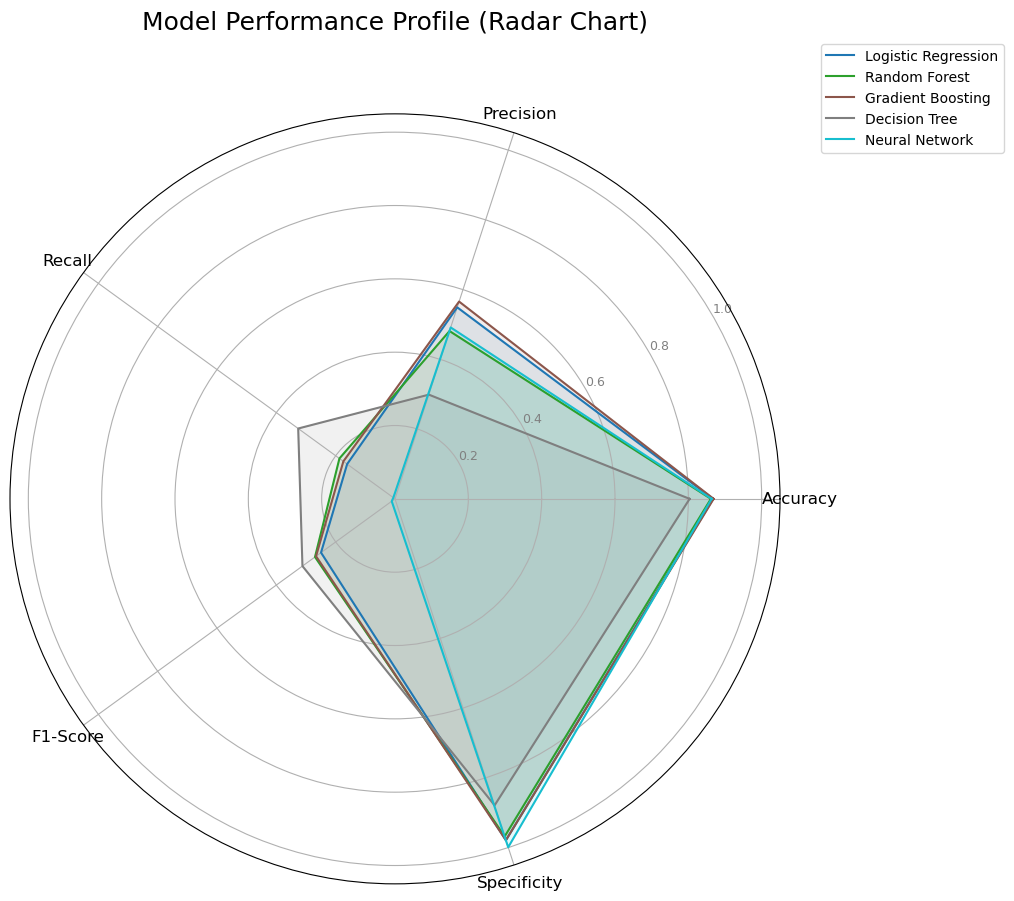


--- Interpretation of Radar Chart ---
This chart compares models across key metrics (scaled 0-1).
Each axis represents a metric. Each colored line/area is a model.
Points closer to the edge indicate better performance on that metric.
The overall shape shows the performance profile/balance of each model.

**Objective 6: Effective Communication and Visualization of Findings - COMPLETED**


In [20]:
# **Objective 6: Enhanced Visualization - Radar Chart Comparison**

print("\n**Objective 6: Effective Communication and Visualization of Findings**")
print("--- Radar Chart Performance Comparison ---")

# --- Ensure necessary data is available ---
# These variables should be defined and populated from previous objectives
if 'trained_models' not in locals() or not trained_models:
    print("Error: 'trained_models' dictionary not found or is empty. Cannot create radar chart.")
elif 'X_test_vif' not in locals():
    print("Error: 'X_test_vif' (VIF-reduced test features) not found. Cannot create radar chart.")
elif 'y_test_orig' not in locals():
    print("Error: 'y_test_orig' (original 1D test labels) not found. Cannot create radar chart.")
elif y_test_orig.ndim != 1 or not np.all(np.isin(np.unique(y_test_orig), [0, 1])):
     print(f"Error: 'y_test_orig' must be a 1D array with only binary (0, 1) labels. Found unique values: {np.unique(y_test_orig)}. Cannot create radar chart.")
else:
    # --- Calculate or Retrieve Metrics for Radar Chart ---
    print("Preparing metrics for Radar Chart...")
    model_performance_radar = {}

    for name, model in trained_models.items():
         print(f"  Calculating metrics for: {name}")
         y_pred = None # Initialize prediction variable
         try:
            # --- Get Class Predictions (0 or 1) ---
            if name == 'Neural Network' and isinstance(model, Sequential):
                y_pred_proba_keras = model.predict(X_test_vif, verbose=0) # Get probabilities
                # Handle sigmoid (binary) or potential softmax output
                if y_pred_proba_keras.shape[1] == 1: # Sigmoid output
                    y_pred = (y_pred_proba_keras > 0.5).astype(int).flatten()
                elif y_pred_proba_keras.shape[1] > 1: # Softmax output, choose class with max prob
                    y_pred = np.argmax(y_pred_proba_keras, axis=1)
                else: # Unexpected shape
                     print(f"    Warning: Cannot determine predictions for Keras model {name}. Skipping.")
                     continue
            elif hasattr(model, 'predict'): # Scikit-learn model
                y_pred = model.predict(X_test_vif)
            else: # Model doesn't have a predict method
                print(f"    Warning: Model '{name}' does not have a predict method. Skipping.")
                continue

            # --- Calculate Metrics from Predictions and True Labels ---
            # Ensure y_pred is not None before calculating metrics
            if y_pred is None:
                print(f"    Skipped metric calculation for {name} due to prediction issue.")
                continue

            cm = confusion_matrix(y_test_orig, y_pred)
            # Ensure confusion matrix is 2x2 before calculating Specificity
            if cm.shape == (2, 2):
                tn, fp, fn, tp = cm.ravel()
                specificity = tn / (tn + fp) if (tn + fp) > 0 else 0 # True Negative Rate
            else:
                 print(f"    Warning: CM for {name} is not 2x2. Setting Specificity to NaN.")
                 specificity = np.nan # Cannot calculate Specificity accurately

            # Calculate other standard metrics (handle potential division by zero)
            # Note: For binary, average='binary' (default) or 'weighted' often give same result if classes are 0/1
            accuracy = accuracy_score(y_test_orig, y_pred)
            precision = precision_score(y_test_orig, y_pred, zero_division=0, pos_label=1) # Precision for the positive class (1)
            recall = recall_score(y_test_orig, y_pred, zero_division=0, pos_label=1)    # Recall for the positive class (1) = Sensitivity / TPR
            f1 = f1_score(y_test_orig, y_pred, zero_division=0, pos_label=1)         # F1 for the positive class (1)

            # Store metrics for this model
            model_performance_radar[name] = {
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall, # Sensitivity / TPR
                'F1-Score': f1,
                'Specificity': specificity # TNR
            }

         except Exception as e:
            # Catch any errors during prediction or metric calculation for a model
            print(f"    Error calculating metrics for {name}: {e}")
            # Add placeholder NaN values if calculation fails
            model_performance_radar[name] = {metric: np.nan for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']}

    # --- Create DataFrame from Calculated Metrics ---
    radar_df = pd.DataFrame.from_dict(model_performance_radar, orient='index')
    # Drop models that had calculation errors (all NaN rows)
    radar_df.dropna(how='all', inplace=True)

    if radar_df.empty:
         print("\nError: No valid performance metrics calculated. Cannot create radar chart.")
    else:
        # --- Prepare for Radar Chart Plotting ---
        categories = list(radar_df) # Get metric names (e.g., 'Accuracy', 'Precision', etc.)
        N = len(categories)         # Number of metrics/axes

        # Calculate angles for each axis on the radar chart (divide circle by N)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1] # Close the circle by repeating the first angle

        # --- Create Radar Plot ---
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True)) # Create figure and polar axes

        # Set axes limits and labels
        plt.xticks(angles[:-1], categories, size=12) # Place metric labels at calculated angles
        ax.set_rlabel_position(30) # Position numerical labels slightly away from center
        plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2","0.4","0.6","0.8","1.0"], color="grey", size=9) # Set y-axis ticks and labels
        plt.ylim(0, 1.05) # Set y-axis limit slightly above 1 for visibility

        # --- Plot Data for Each Model ---
        color_cycle = plt.cm.get_cmap('tab10', len(radar_df)) # Get a color map

        for i, (index, row) in enumerate(radar_df.iterrows()):
            values = row.values.flatten().tolist() # Get performance values for the model
            values += values[:1] # Repeat first value to close the polygon

            # Plot the model's performance polygon
            ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=index, color=color_cycle(i))
            # Fill the area under the polygon for better visibility
            ax.fill(angles, values, color=color_cycle(i), alpha=0.1)

        # --- Add Legend and Title ---
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10) # Position legend outside plot
        plt.title('Model Performance Profile (Radar Chart)', size=18, y=1.1) # Add title

        # Display the plot
        plt.show()

        print("\n--- Interpretation of Radar Chart ---")
        print("This chart compares models across key metrics (scaled 0-1).")
        print("Each axis represents a metric. Each colored line/area is a model.")
        print("Points closer to the edge indicate better performance on that metric.")
        print("The overall shape shows the performance profile/balance of each model.")

# (Rest of Objective 6 code, like individual CMs if still desired)
print("\n**Objective 6: Effective Communication and Visualization of Findings - COMPLETED**")